## Problem Statement

- This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. 


- This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 


- There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("temp.csv")

In [7]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Column Description

- 1. station - used weather station number: 1 to 25
- 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- 19. lat - Latitude (Â°): 37.456 to 37.645
- 20. lon - Longitude (Â°): 126.826 to 127.135
- 21. DEM - Elevation (m): 12.4 to 212.3
- 22. Slope - Slope (Â°): 0.1 to 5.2
- 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is Next_Tmax and Next_Tmin	


- 2) The target variable is continuous in nature


- 3) Solving it as a Regression Problem


- 4) Our machine learning algorithm needs to predict the next day minimum and maximum temperature

## Checking the data types

In [8]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Data types include:

- Object
- Float
- Int

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

0

### No duplicates in the dataset

### Lets check for missing values

In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

### A lot of missing values in data

<AxesSubplot:>

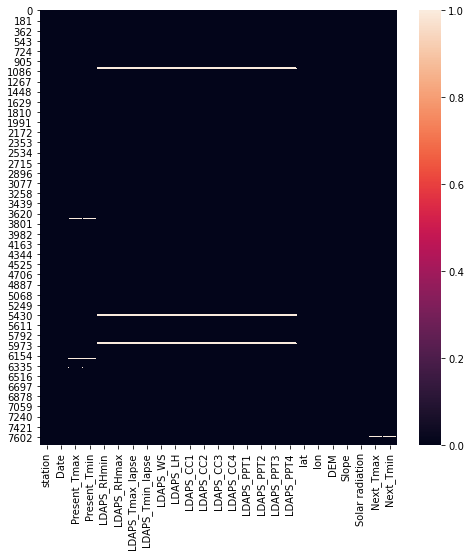

In [11]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [12]:
df.shape

(7752, 25)

- Rows : 7752

- Columns : 25

#### Data Descriptiion

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


#### Some overview of data:

- The Max Air temperature range was between (20 degree C to 37 degree C)


- The Minimum air temperature was betwwen (11 degree C to 29 degree C)


- The minimum Humidity(amount of water vapour) was between 19% to 98%


- The maximum Humidity(amount of water vapour) was between 58% to 100%


- The Max lapse (change in temperature of air) ranges between 17 degree C to 38 degree C


- The Min lapse (change in temperature of air) ranges between 14 degree C to 29 degree C
 

- Wind speed ranges between (2.8 m/s to 21.8 m/s)


- The average latent heat flux (W/m2) ranges between (-13 W/m2 to 213 W/m2) 


- 1st 6-hour split average cloud cover (0 - 5 h), 2nd (6 - 11 h), 3rd(12 - 17 h), 4th(18 - 23 h)


- Elevation ranges from (12.37m to 212m)


- Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

# EDA

In [14]:
sns.set_theme(style="darkgrid")

#### Using pandas Date Time method for furthur analysis
Lets create 3 more columns

- Date

- Month 

- Day


In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda a:a.month)
df['Day']=df['Date'].apply(lambda a:a.day)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

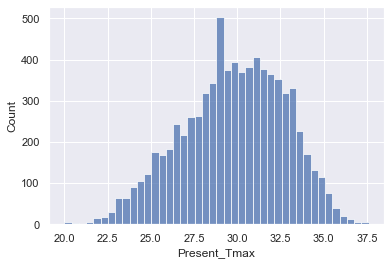

In [16]:
sns.histplot(x="Present_Tmax",data=df)

Observations from the plot:

Maximum present average Air Temperature is about 29 deg C

Maximum present average Air Temperature ranges from 20 deg C to 38 deg C

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

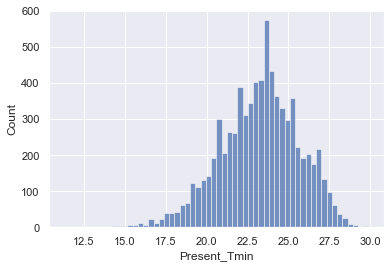

In [17]:
sns.histplot(x="Present_Tmin",data=df)

Observations from the plot:

Minimum present average Air Temperature is about 23 deg C

Minimum present average Air Temperature ranges from 11 deg C to 29 deg C

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

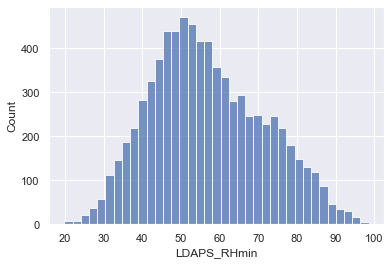

In [18]:
sns.histplot(x="LDAPS_RHmin",data=df)

Observations from the plot:

The minimum average Relative Humidity is ~ 57%

The Relative Humidity can go upto 98% more the humidity wetter the day

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

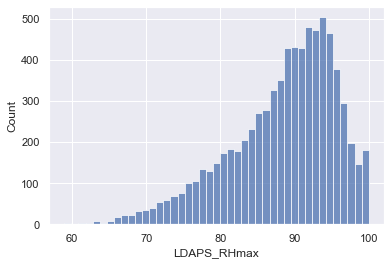

In [19]:
sns.histplot(x="LDAPS_RHmax",data=df)

Observations from the plot:

The max average Relative Humidity is ~ 88%

The Relative Humidity can go upto 100%, more the humidity wetter the day

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

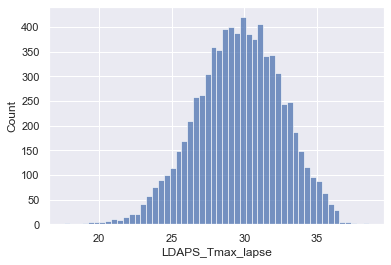

In [20]:
sns.histplot(x="LDAPS_Tmax_lapse",data=df)

Observations from the plot:

The maximum average air temperature applied lapse rate ~ 29 deg C

Temp Lapse is change in temperature due to altitude change

The max Temp Lapse change in temperature can go upto 38 deg C.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

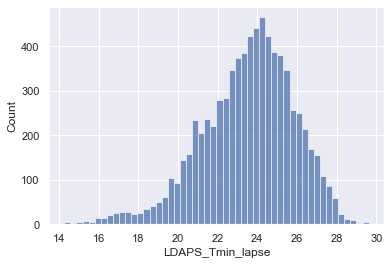

In [21]:
sns.histplot(x="LDAPS_Tmin_lapse",data=df)

Observations from the plot:

The minimum average air temperature applied lapse rate ~ 23 deg C

Temp Lapse is change in temperature due to altitude change

The min Temp Lapse change in temperature can go upto 29 deg C.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

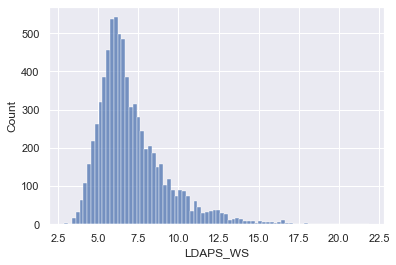

In [22]:
sns.histplot(x="LDAPS_WS",data=df)

Observations from the plot:

The next-day average wind speed is approx ~ 7.09

Max wind speed can go upto 21 m/s

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

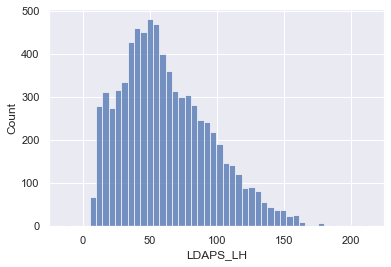

In [23]:
sns.histplot(x="LDAPS_LH",data=df)

Observations from the plot:

The next-day average latent heat flux is 62.50 W/m2

The maximum average latent heat flux can rise up to 213.41 W/m2

Text(0.5, 1.0, 'Max Air Temperature per year')

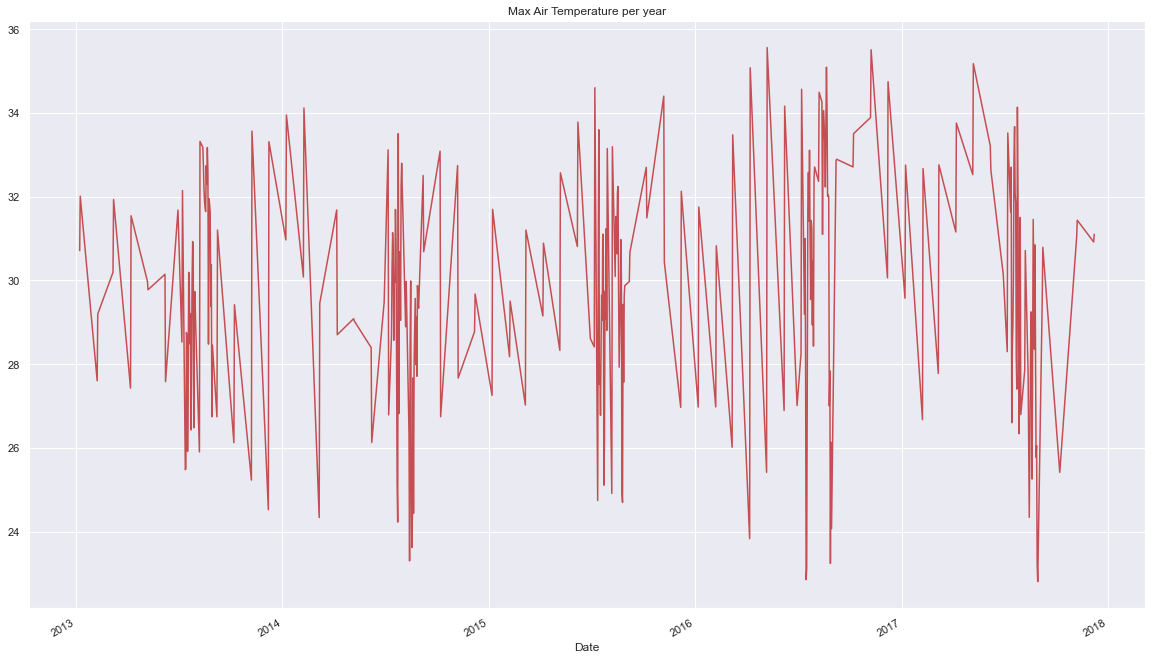

In [24]:
date=df.groupby('Date').mean()
plt.figure(figsize=(20,12))
date['Present_Tmax'].plot(color="r")
plt.title("Max Air Temperature per year")

observations from the plot:

- There is this pattern in the plot as the year passes by the Max Air temperature range per day increases


- In 2013 the Air temperature range per day was between 27 deg C and 32 deg C 


- But as the year passes the Air temperature gap becomes bigger in 2018 the max low temp was ~ 20 deg C 


- The highest per day Air temperature is recorded to be ~ 37 deg C in the year 2016 - 2017


- The lowest per day Air temperature is recorded to be ~ 19 deg C in the year 2017 - 2018

Text(0.5, 1.0, 'Min Air Temperature per year')

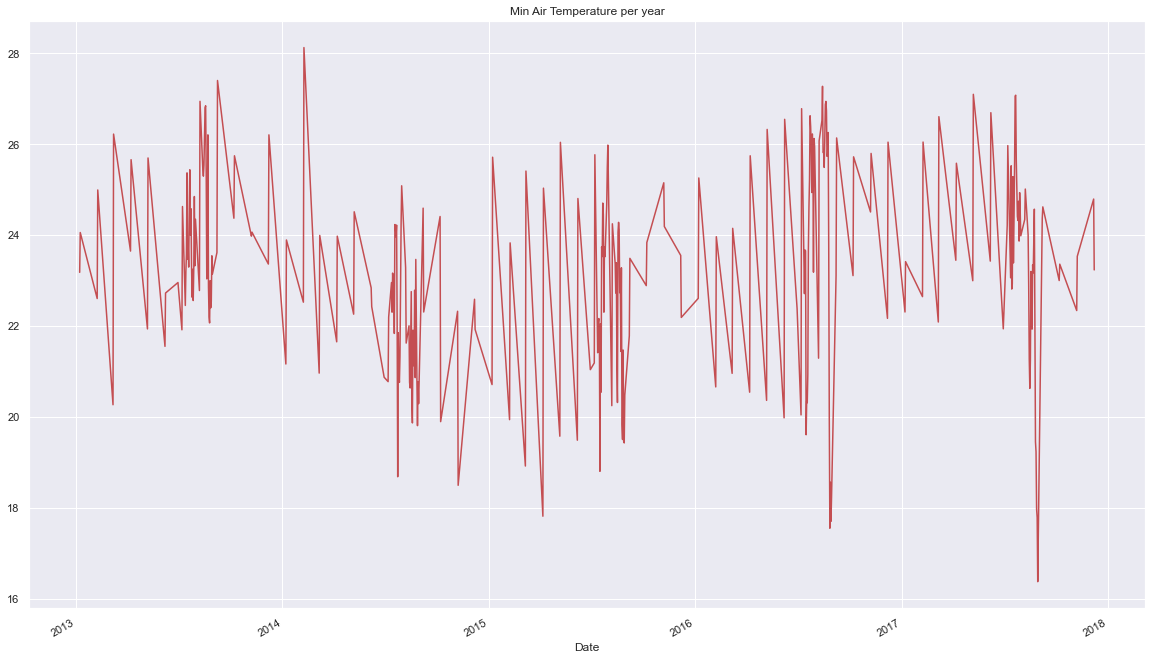

In [25]:
plt.figure(figsize=(20,12))
date['Present_Tmin'].plot(color="r")
plt.title("Min Air Temperature per year")

Observations from the plot:

- The highest minimum air temperature was recorded in the year 2014 - 15
it was ~ 29 deg C


- The lowest minimum air temperature was recorded in the year 2017 - 18
it was ~ 17 deg C 

Text(0.5, 1.0, 'Max Air Temperature per month')

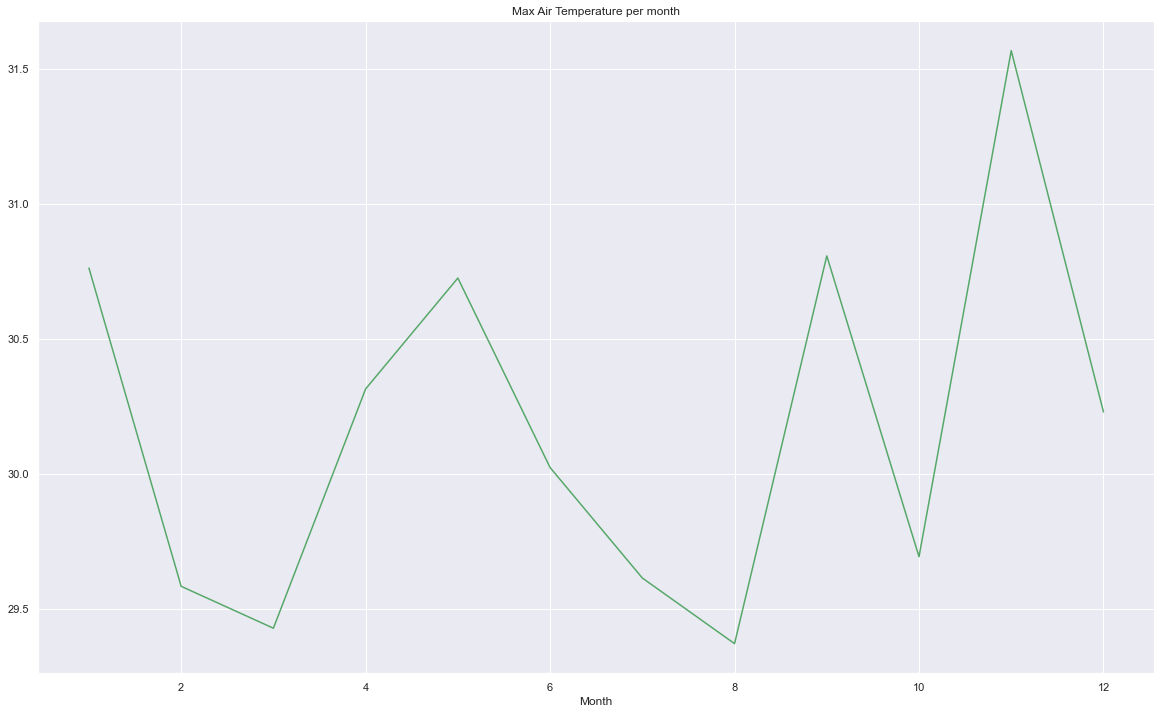

In [26]:
month=df.groupby('Month').mean()
plt.figure(figsize=(20,12))
month['Present_Tmax'].plot(color="g")
plt.title("Max Air Temperature per month")

Observations from the plot:

The max Air temperature is low during the months of February, March and June

Highest in the month of November

Text(0.5, 1.0, 'Next day maximum relative humidity per year')

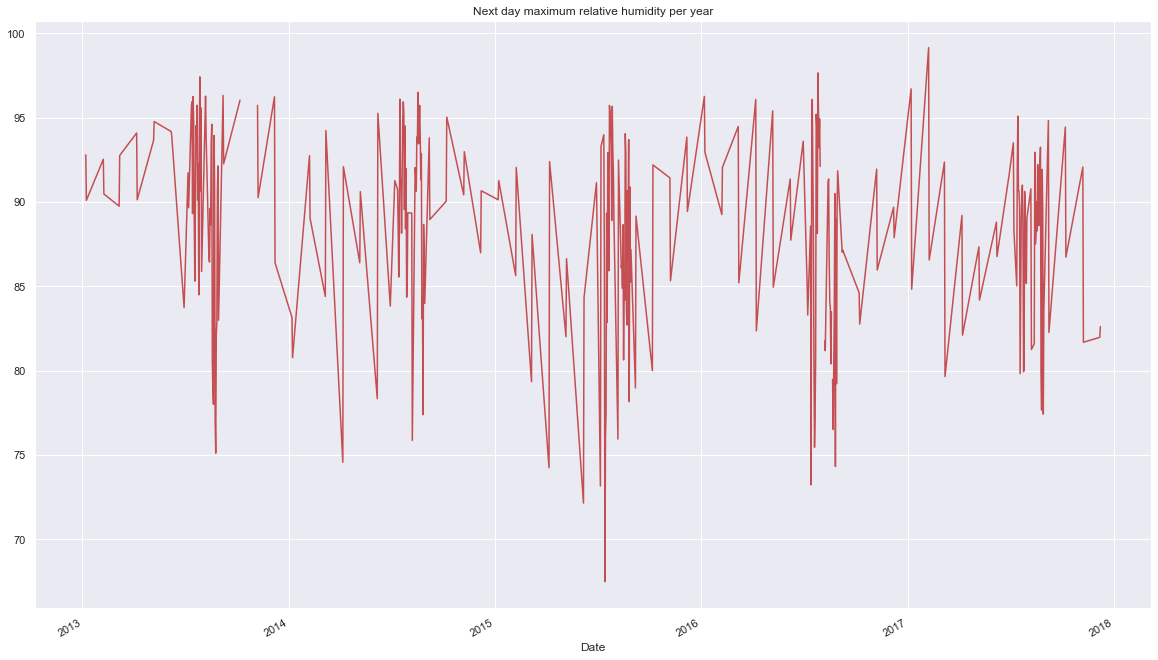

In [27]:
plt.figure(figsize=(20,12))
date['LDAPS_RHmax'].plot(color="r")
plt.title("Next day maximum relative humidity per year")

Observations for Max Relative Humidity:

Humidity is the amount of water vapour in air the lowest relative humidity was recorded in the year 2015 - 2016

Highest relative humidity was recorded in early 2017

Text(0.5, 1.0, 'Max Humidity per month')

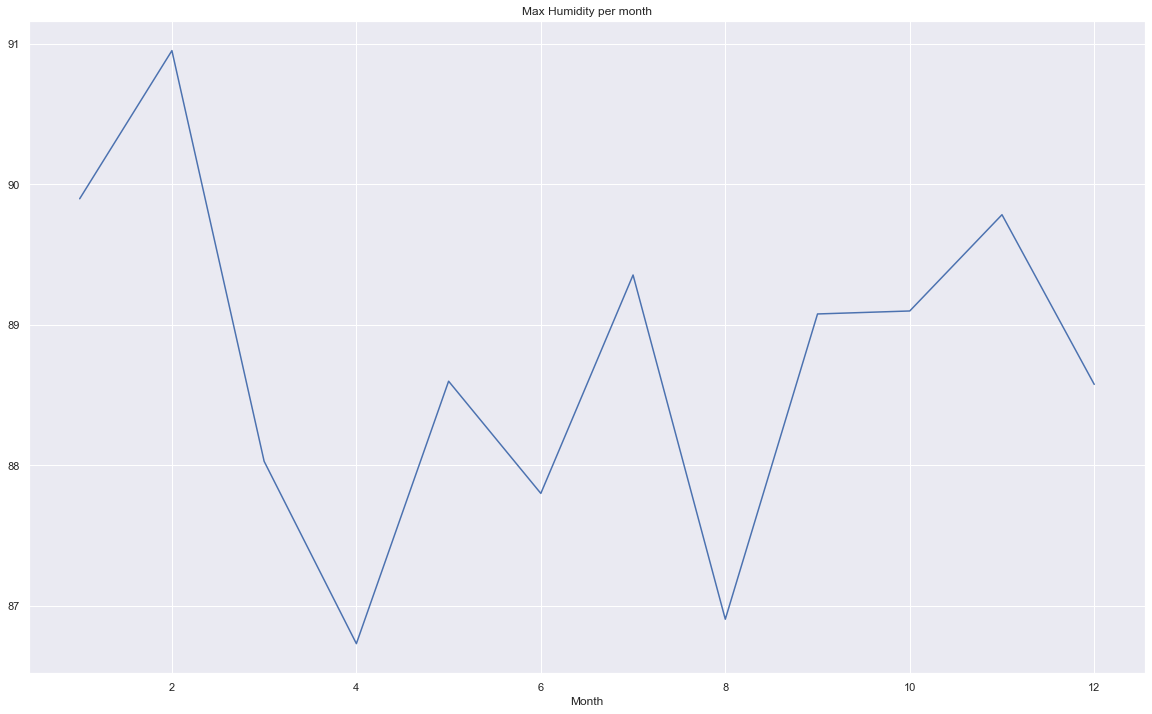

In [28]:
plt.figure(figsize=(20,12))
month['LDAPS_RHmax'].plot(color="b")
plt.title("Max Humidity per month")

Observations for Max Humidity:

The month of February has recorded the highest levels of Humidity

In April and August the humidity levels are lower 

Text(0.5, 1.0, 'Maximum air temperature applied lapse rate per year')

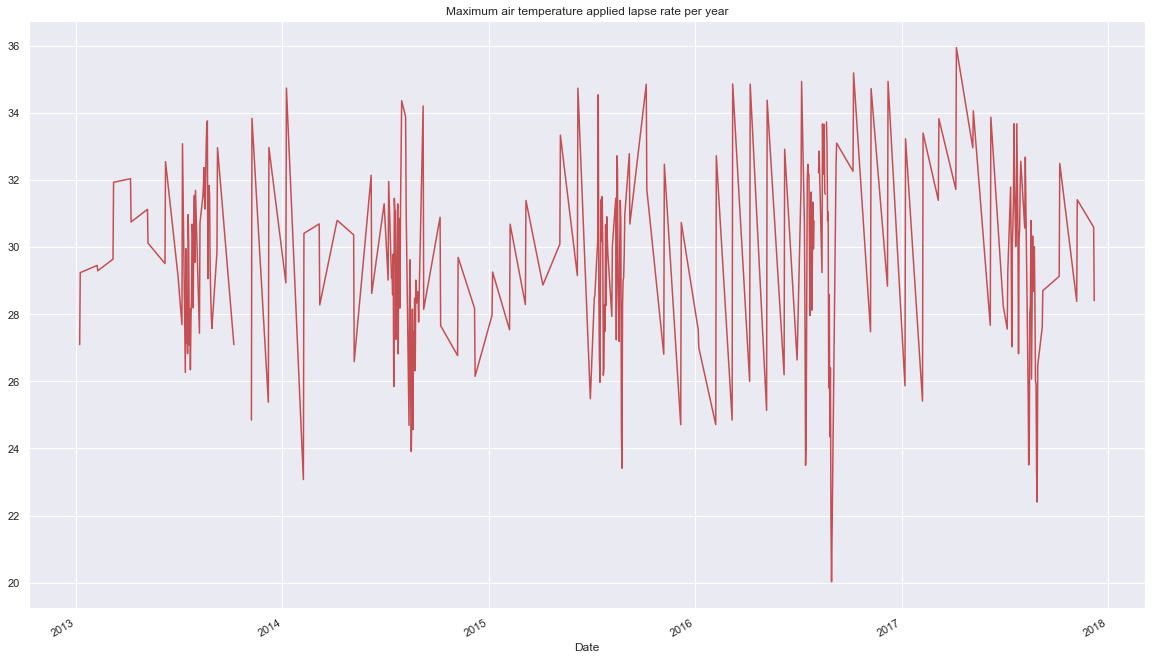

In [29]:
plt.figure(figsize=(20,12))
date['LDAPS_Tmax_lapse'].plot(color="r")
plt.title("Maximum air temperature applied lapse rate per year")

Observations for max Lapse rate:

Lapse Rate is the rate at which temperature changes with height in the Atmosphere

The maximum air temperature applied lapse rate was recorded in the year 2017 - 18 which was ~ 36 deg C

The lowest maximum air temperature applied lapse rate was recorded in the year 2016 - 17 which was ~ 21 deg C

Text(0.5, 1.0, 'Next day average wind speed (m/s)')

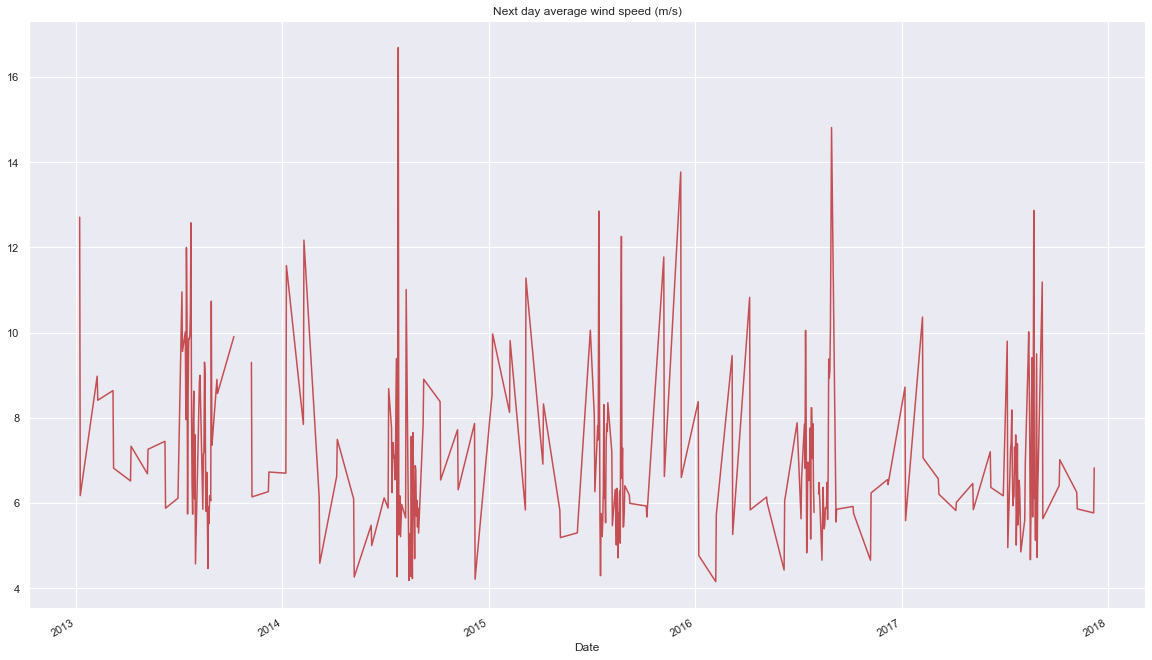

In [30]:
plt.figure(figsize=(20,12))
date['LDAPS_WS'].plot(color="r")
plt.title("Next day average wind speed (m/s)")

Observations for average wind speed:

The maximum wind speed was recorded in the year 2014 - 15 which was ~ 18 m/s

Text(0.5, 1.0, 'Wind speed per month')

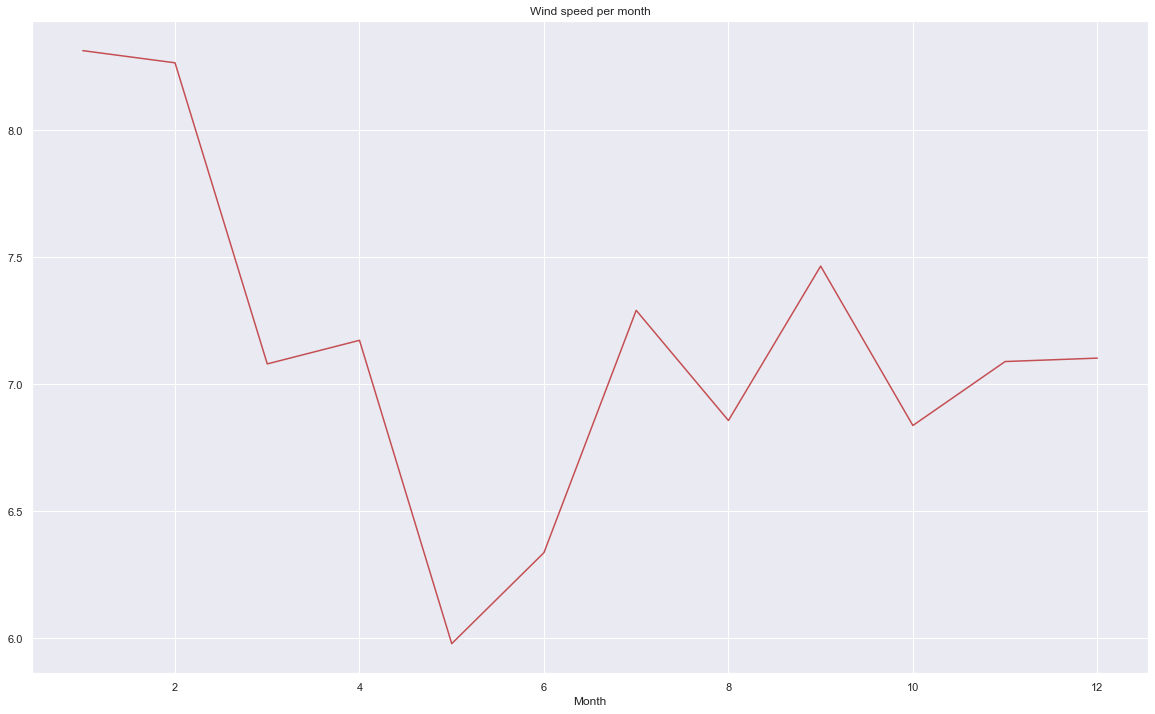

In [31]:
plt.figure(figsize=(20,12))
month['LDAPS_WS'].plot(color="r")
plt.title("Wind speed per month")

Observations from the plot:

Highest wind speed recorded in the monts January and February

The Month of May has recorded the lowest wind speed 

Text(0.5, 1.0, '1st 6-hour split average cloud cover ')

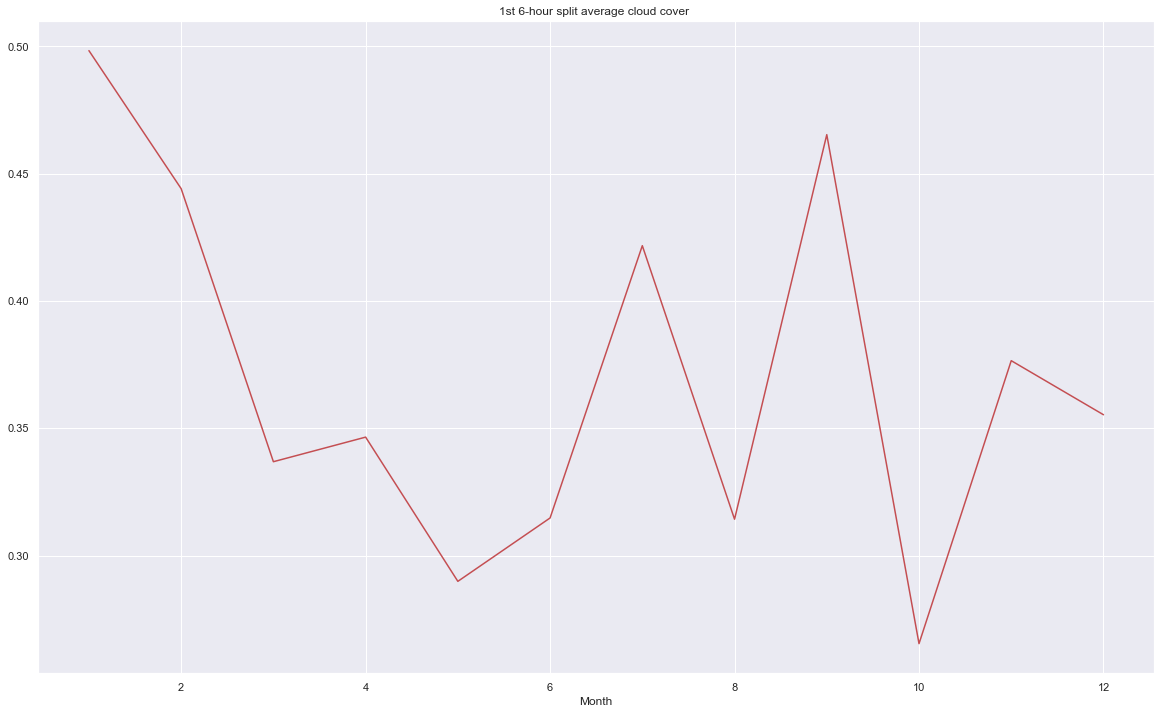

In [32]:
plt.figure(figsize=(20,12))
month['LDAPS_CC1'].plot(color="r")
plt.title("1st 6-hour split average cloud cover ")

Observations from the plot:

The highest 1st 6-hour split average cloud cover recorded in the month of January

October has the least amount of 1st 6-hour split average cloud cover

Text(0.5, 1.0, '2nd 6-hour split average cloud cover ')

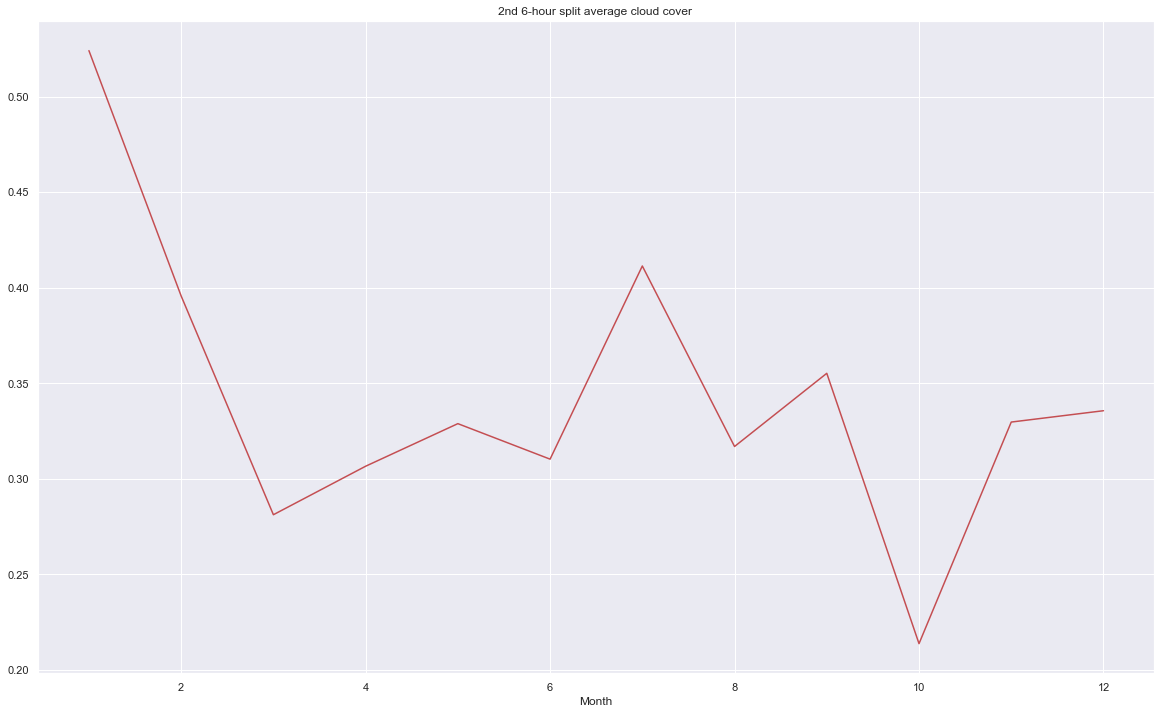

In [33]:
plt.figure(figsize=(20,12))
month['LDAPS_CC2'].plot(color="r")
plt.title("2nd 6-hour split average cloud cover ")

Observations from the plot:

The highest 2nd 6-hour split average cloud cover recorded in the month of January

October has the least amount of 2nd 6-hour split average cloud cover

for 2nd 6-hour split the cloud coverage has reduced as compared to t5he 1st 6 hours

Text(0.5, 1.0, '3rd 6-hour split average cloud cover ')

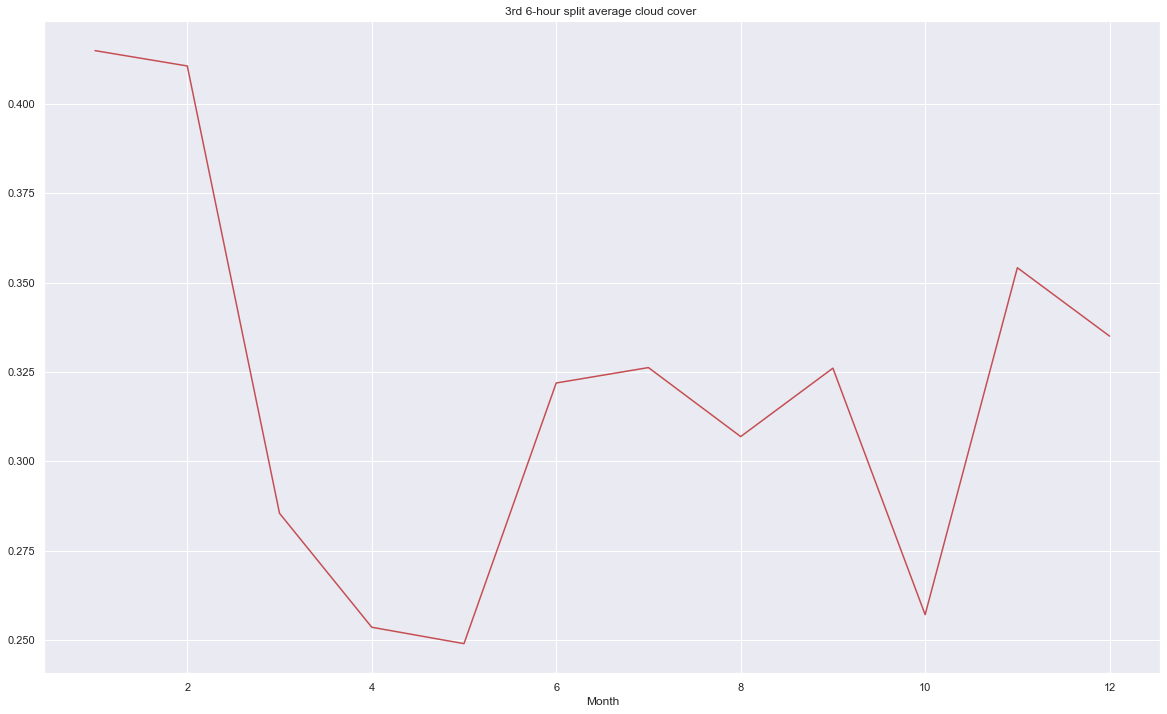

In [34]:
plt.figure(figsize=(20,12))
month['LDAPS_CC3'].plot(color="r")
plt.title("3rd 6-hour split average cloud cover ")

Observations from the plot:

The highest 3rd 6-hour split average cloud cover recorded in the month of January

April -May has the least amount of 3rd 6-hour split average cloud cover


Text(0.5, 1.0, '4th 6-hour split average cloud cover ')

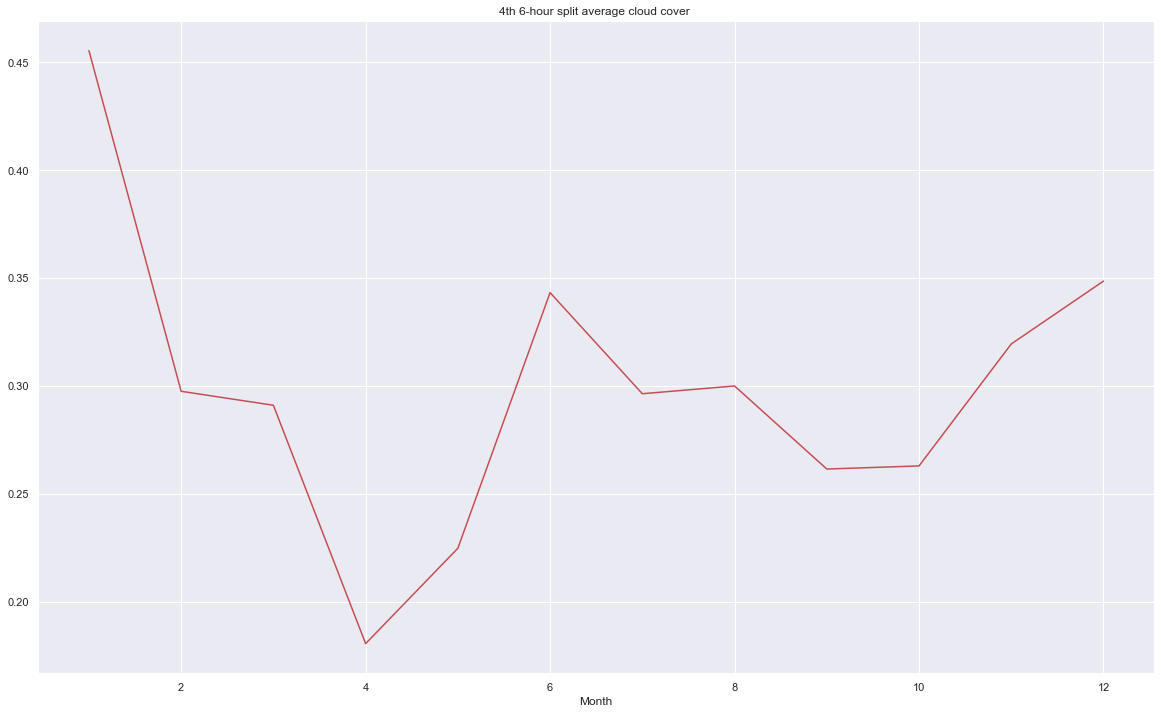

In [35]:
plt.figure(figsize=(20,12))
month['LDAPS_CC4'].plot(color="r")
plt.title("4th 6-hour split average cloud cover ")

Observations from the plot:

The highest 4th 6-hour split average cloud cover recorded in the month of January

April has the least amount of 4th 6-hour split average cloud cover

Text(0.5, 1.0, 'Solar radiation')

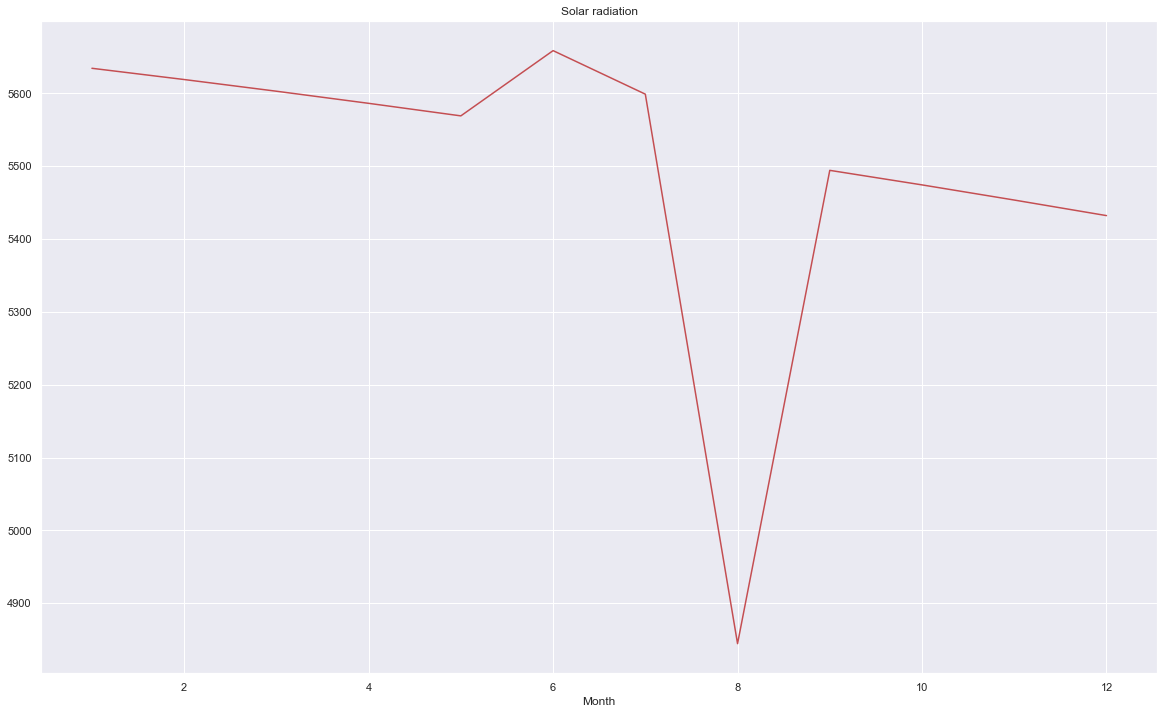

In [36]:
plt.figure(figsize=(20,12))
month['Solar radiation'].plot(color="r")
plt.title("Solar radiation")

Observations from the plot:

The radiant energy emmitted by sun is highest in the month of june

Radiant energy emmitted by sun is lowest in the month of August


Text(0.5, 1.0, 'Solar radiation per day')

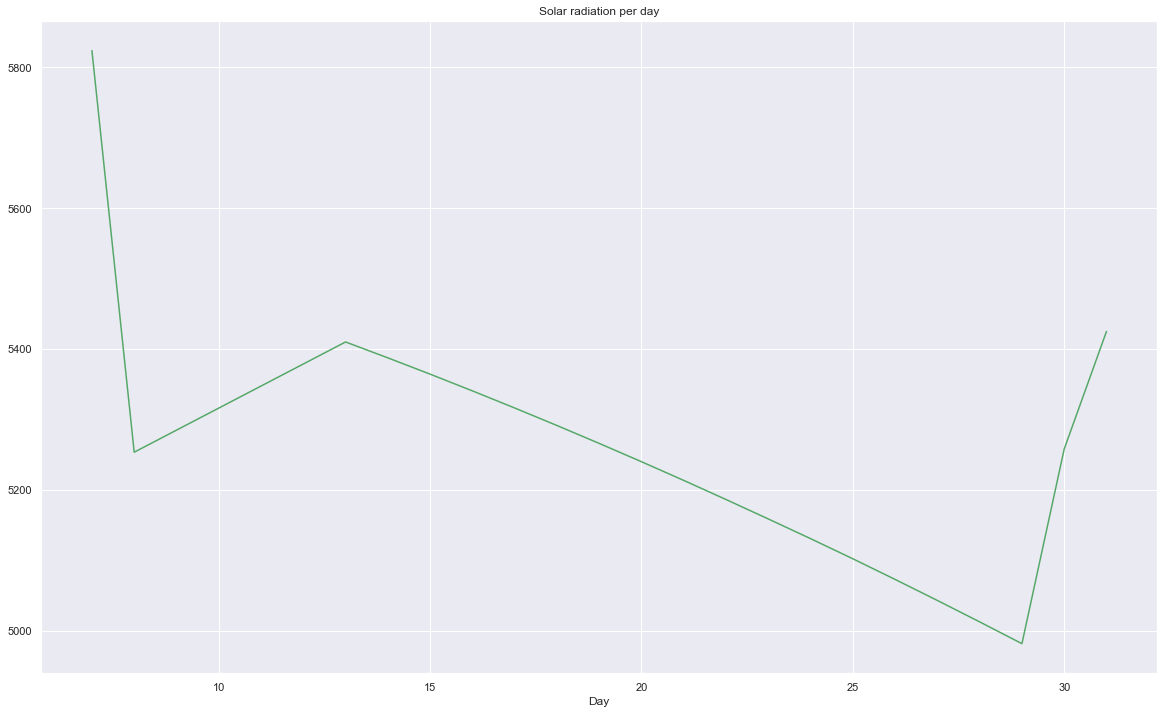

In [37]:
day=df.groupby('Day').mean()
plt.figure(figsize=(20,12))
day['Solar radiation'].plot(color="g")
plt.title("Solar radiation per day")

Observations from the plot:
    
We can observe that solar radiations are higher in the first week of the month

Solar radiations are lowest in the last week of the month 

Text(0.5, 1.0, '1st 6-hour split average precipitation (0-5 h)')

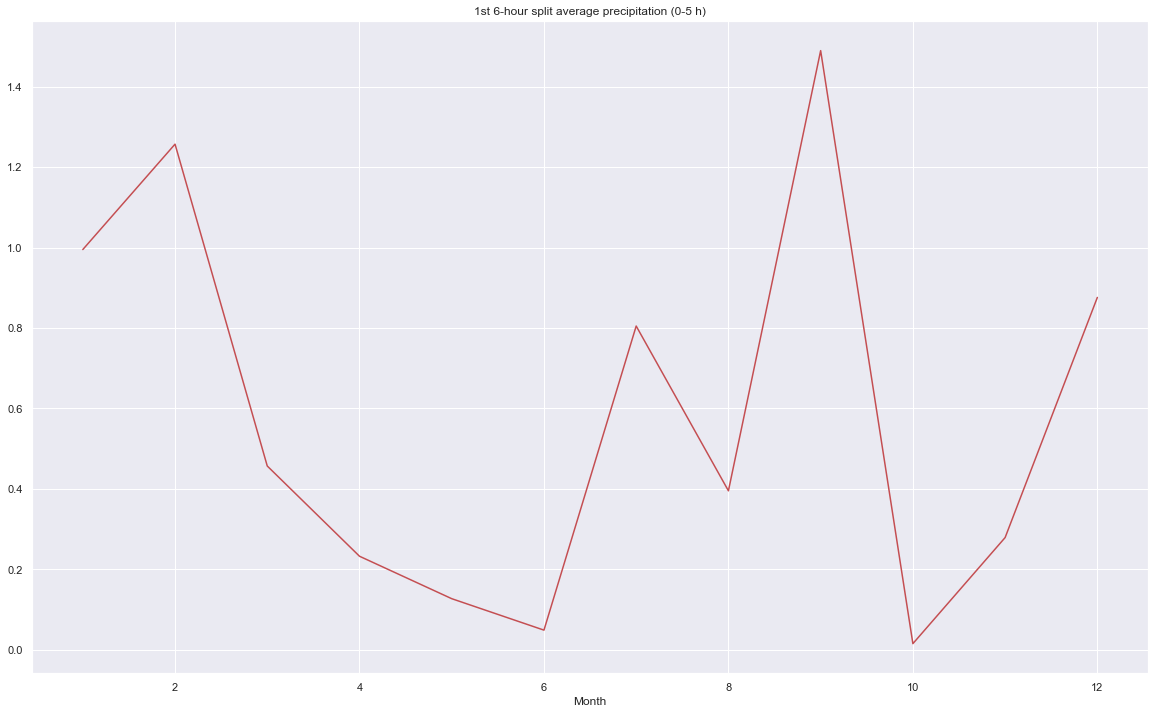

In [38]:
plt.figure(figsize=(20,12))
month['LDAPS_PPT1'].plot(color="r")
plt.title("1st 6-hour split average precipitation (0-5 h)")

Observations for 1st 6-hour split average precipitation:

from the plot we can say that precipitation for first 6-hours is highest in the month of september

Lowest in the month of october

## Data Cleaning

In [39]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                2
Day                  2
dtype: int64

we have a lot of missing values

Replacing the null values in station with Mean 

In [40]:
df["station"] = df["station"].replace(np.nan,13.0)

In [41]:
df["station"].isnull().sum()

0

No more null values in "station"

Droping the "Date" column as we have already extracted month and day information

In [42]:
df = df.drop("Date",axis=1)

In [43]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30.0


In [44]:
df["Present_Tmax"].mean()

29.76821140328037

Replacing the missing values in "Present_Tmax" with mean values

In [45]:
df["Present_Tmax"] = df["Present_Tmax"].replace(np.nan,df["Present_Tmax"].mean())

In [46]:
df["Present_Tmax"].isnull().sum()

0

No more mean values in "Present_Tmax"

In [47]:
df["Present_Tmin"].mean()

23.22505857849521

Replacing the missing values in "Present_Tmin" with mean values

In [48]:
df["Present_Tmin"] = df["Present_Tmin"].replace(np.nan,df["Present_Tmin"].mean())

In [49]:
df["LDAPS_RHmin"].mean()

56.75937215069287

In [50]:
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].replace(np.nan,df["LDAPS_RHmin"].mean())

In [51]:
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].replace(np.nan,df["LDAPS_RHmax"].mean())

In [52]:
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].replace(np.nan,df["LDAPS_Tmax_lapse"].mean())

In [53]:
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].replace(np.nan,df["LDAPS_Tmin_lapse"].mean())

In [54]:
df["LDAPS_WS"].median()

6.547470301000001

In [55]:
df["LDAPS_WS"] = df["LDAPS_WS"].replace(np.nan,df["LDAPS_WS"].median())

In [56]:
df["LDAPS_LH"].median()

56.86548154

In [57]:
df["LDAPS_LH"] = df["LDAPS_LH"].replace(np.nan,df["LDAPS_LH"].median())

In [58]:
df["LDAPS_CC1"].mean()

0.36877358559828194

In [59]:
df["LDAPS_CC1"] = df["LDAPS_CC1"].replace(np.nan,df["LDAPS_CC1"].mean())

In [60]:
df["LDAPS_CC2"] = df["LDAPS_CC2"].replace(np.nan,df["LDAPS_CC2"].mean())

In [61]:
df["LDAPS_CC3"] = df["LDAPS_CC3"].replace(np.nan,df["LDAPS_CC3"].mean())

In [62]:
df["LDAPS_CC4"] = df["LDAPS_CC4"].replace(np.nan,df["LDAPS_CC4"].mean())

In [63]:
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].replace(np.nan,df["LDAPS_PPT1"].median())

In [64]:
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].replace(np.nan,df["LDAPS_PPT2"].median())

In [65]:
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].replace(np.nan,df["LDAPS_PPT3"].median())

In [66]:
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].replace(np.nan,df["LDAPS_PPT4"].median())

In [67]:
df["Next_Tmax"] = df["Next_Tmax"].replace(np.nan,df["Next_Tmax"].mean())

In [68]:
df["Next_Tmin"] = df["Next_Tmin"].replace(np.nan,df["Next_Tmin"].mean())

In [69]:
df["Month"].mode()

0    7.0
dtype: float64

In [70]:
df["Month"] = df["Month"].replace(np.nan,7.0)

In [71]:
df["Day"] = df["Day"].replace(np.nan,16.0)

In [72]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
dtype: int64

##### No more null values in data

## Outliers

In [73]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

The first quartile : 7.0 for station
The third quartile : 19.0 for station
The IQR : 12.0 for station
The left outlier : -11.0 for station
The Right outlier : 37.0 for station
Left Outliers : 0
Right Outliers : 0


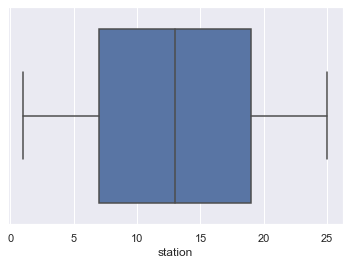

In [74]:
sns.boxplot(x="station",data=df)
outliers("station")

No outliers in Station 

The first quartile : 27.8 for Present_Tmax
The third quartile : 32.0 for Present_Tmax
The IQR : 4.199999999999999 for Present_Tmax
The left outlier : 21.5 for Present_Tmax
The Right outlier : 38.3 for Present_Tmax
Left Outliers : 11
Right Outliers : 0


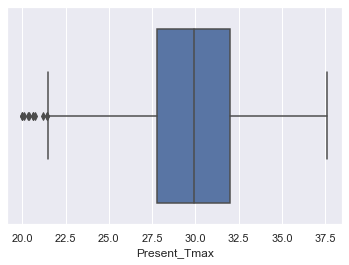

In [75]:
sns.boxplot(x="Present_Tmax",data=df)
outliers("Present_Tmax")

Some outliers in Present_Tmax

The first quartile : 21.7 for Present_Tmin
The third quartile : 24.9 for Present_Tmin
The IQR : 3.1999999999999993 for Present_Tmin
The left outlier : 16.9 for Present_Tmin
The Right outlier : 29.699999999999996 for Present_Tmin
Left Outliers : 71
Right Outliers : 3


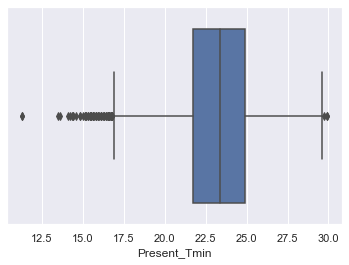

In [76]:
sns.boxplot(x="Present_Tmin",data=df)
outliers("Present_Tmin")

Some outliers in Present_Tmin

The first quartile : 46.04616165 for LDAPS_RHmin
The third quartile : 67.0382537875 for LDAPS_RHmin
The IQR : 20.992092137499995 for LDAPS_RHmin
The left outlier : 14.55802344375001 for LDAPS_RHmin
The Right outlier : 98.52639199375 for LDAPS_RHmin
Left Outliers : 0
Right Outliers : 0


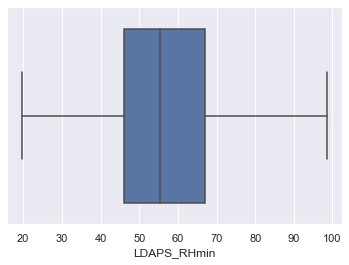

In [77]:
sns.boxplot(x="LDAPS_RHmin",data=df)
outliers("LDAPS_RHmin")

No outliers in LDAPS_RHmin

The first quartile : 84.31692314 for LDAPS_RHmax
The third quartile : 93.7045001975 for LDAPS_RHmax
The IQR : 9.387577057499996 for LDAPS_RHmax
The left outlier : 70.23555755375 for LDAPS_RHmax
The Right outlier : 107.78586578374998 for LDAPS_RHmax
Left Outliers : 148
Right Outliers : 0


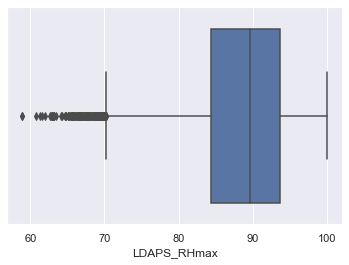

In [78]:
sns.boxplot(x="LDAPS_RHmax",data=df)
outliers("LDAPS_RHmax")

Some outliers in LDAPS_RHmax

The first quartile : 27.693091405 for LDAPS_Tmax_lapse
The third quartile : 31.683818599999995 for LDAPS_Tmax_lapse
The IQR : 3.9907271949999945 for LDAPS_Tmax_lapse
The left outlier : 21.70700061250001 for LDAPS_Tmax_lapse
The Right outlier : 37.66990939249999 for LDAPS_Tmax_lapse
Left Outliers : 46
Right Outliers : 4


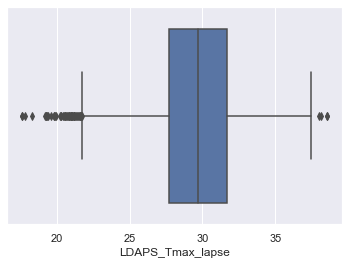

In [79]:
sns.boxplot(x="LDAPS_Tmax_lapse",data=df)
outliers("LDAPS_Tmax_lapse")

Some outliers in LDAPS_Tmax_lapse

The first quartile : 22.114651377500003 for LDAPS_Tmin_lapse
The third quartile : 25.1340002375 for LDAPS_Tmin_lapse
The IQR : 3.0193488599999974 for LDAPS_Tmin_lapse
The left outlier : 17.585628087500005 for LDAPS_Tmin_lapse
The Right outlier : 29.663023527499995 for LDAPS_Tmin_lapse
Left Outliers : 149
Right Outliers : 0


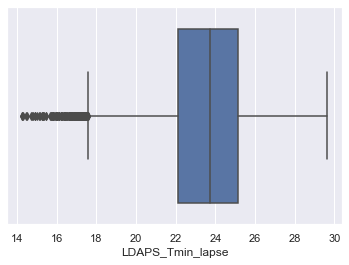

In [80]:
sns.boxplot(x="LDAPS_Tmin_lapse",data=df)
outliers("LDAPS_Tmin_lapse")

Some outliers in LDAPS_Tmin_lapse

The first quartile : 5.68648721525 for LDAPS_WS
The third quartile : 8.007471122 for LDAPS_WS
The IQR : 2.3209839067500004 for LDAPS_WS
The left outlier : 2.205011355124999 for LDAPS_WS
The Right outlier : 11.488946982125 for LDAPS_WS
Left Outliers : 0
Right Outliers : 377


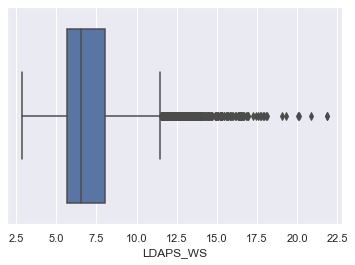

In [81]:
sns.boxplot(x="LDAPS_WS",data=df)
outliers("LDAPS_WS")

Some outliers in LDAPS_WS

The first quartile : 37.532764375 for LDAPS_LH
The third quartile : 83.90458593 for LDAPS_LH
The IQR : 46.371821555 for LDAPS_LH
The left outlier : -32.024967957499996 for LDAPS_LH
The Right outlier : 153.4623182625 for LDAPS_LH
Left Outliers : 0
Right Outliers : 72


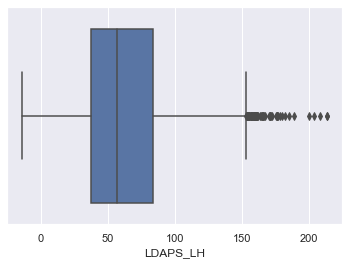

In [82]:
sns.boxplot(x="LDAPS_LH",data=df)
outliers("LDAPS_LH")

Some outliers in LDAPS_LH

The first quartile : 0.14832141599999998 for LDAPS_CC1
The third quartile : 0.5716964517500001 for LDAPS_CC1
The IQR : 0.4233750357500001 for LDAPS_CC1
The left outlier : -0.4867411376250001 for LDAPS_CC1
The Right outlier : 1.2067590053750001 for LDAPS_CC1
Left Outliers : 0
Right Outliers : 0


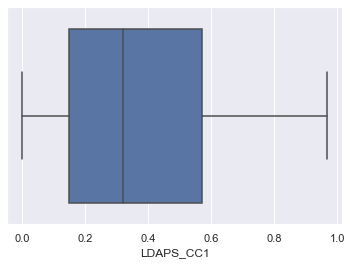

In [83]:
sns.boxplot(x="LDAPS_CC1",data=df)
outliers("LDAPS_CC1")

No outliers in LDAPS_CC1

The first quartile : 0.14232848874999998 for LDAPS_CC2
The third quartile : 0.5549633145 for LDAPS_CC2
The IQR : 0.41263482575000004 for LDAPS_CC2
The left outlier : -0.47662374987500006 for LDAPS_CC2
The Right outlier : 1.173915553125 for LDAPS_CC2
Left Outliers : 0
Right Outliers : 0


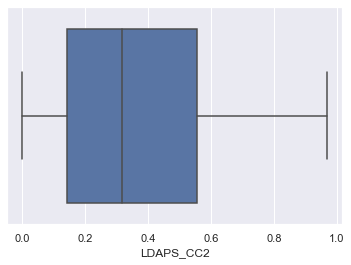

In [84]:
sns.boxplot(x="LDAPS_CC2",data=df)
outliers("LDAPS_CC2")

No outliers in LDAPS_CC2

The first quartile : 0.10310016475 for LDAPS_CC3
The third quartile : 0.4940072505 for LDAPS_CC3
The IQR : 0.39090708575 for LDAPS_CC3
The left outlier : -0.48326046387500005 for LDAPS_CC3
The Right outlier : 1.080367879125 for LDAPS_CC3
Left Outliers : 0
Right Outliers : 0


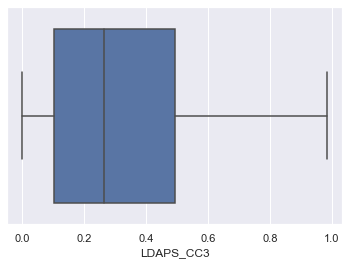

In [85]:
sns.boxplot(x="LDAPS_CC3",data=df)
outliers("LDAPS_CC3")

No outliers in LDAPS_CC3

The first quartile : 0.082740795 for LDAPS_CC4
The third quartile : 0.49723029325 for LDAPS_CC4
The IQR : 0.41448949825000003 for LDAPS_CC4
The left outlier : -0.5389934523750001 for LDAPS_CC4
The Right outlier : 1.118964540625 for LDAPS_CC4
Left Outliers : 0
Right Outliers : 0


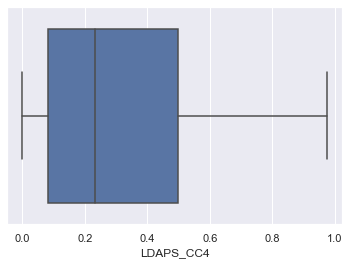

In [86]:
sns.boxplot(x="LDAPS_CC4",data=df)
outliers("LDAPS_CC4")

No outliers in LDAPS_CC4

The first quartile : 0.0 for LDAPS_PPT1
The third quartile : 0.049121697500000006 for LDAPS_PPT1
The IQR : 0.049121697500000006 for LDAPS_PPT1
The left outlier : -0.07368254625000001 for LDAPS_PPT1
The Right outlier : 0.12280424375000001 for LDAPS_PPT1
Left Outliers : 0
Right Outliers : 1690


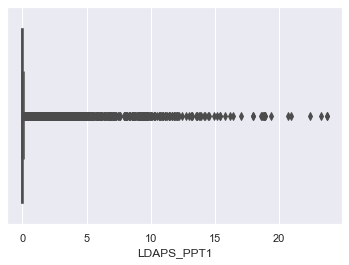

In [87]:
sns.boxplot(x="LDAPS_PPT1",data=df)
outliers("LDAPS_PPT1")

A lot of outliers in LDAPS_PPT1

The first quartile : 0.0 for LDAPS_PPT2
The third quartile : 0.016747907 for LDAPS_PPT2
The IQR : 0.016747907 for LDAPS_PPT2
The left outlier : -0.0251218605 for LDAPS_PPT2
The Right outlier : 0.0418697675 for LDAPS_PPT2
Left Outliers : 0
Right Outliers : 1740


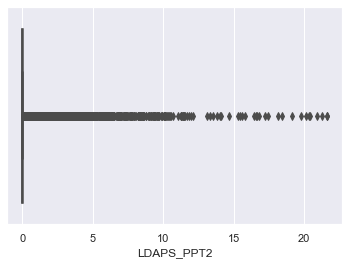

In [88]:
sns.boxplot(x="LDAPS_PPT2",data=df)
outliers("LDAPS_PPT2")

A lot of outliers in LDAPS_PPT2

The first quartile : 0.0 for LDAPS_PPT3
The third quartile : 0.0072310325 for LDAPS_PPT3
The IQR : 0.0072310325 for LDAPS_PPT3
The left outlier : -0.01084654875 for LDAPS_PPT3
The Right outlier : 0.018077581250000002 for LDAPS_PPT3
Left Outliers : 0
Right Outliers : 1722


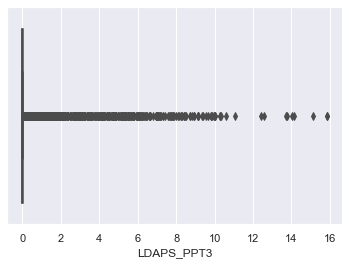

In [89]:
sns.boxplot(x="LDAPS_PPT3",data=df)
outliers("LDAPS_PPT3")

A lot of outliers in LDAPS_PPT3

The first quartile : 0.0 for LDAPS_PPT4
The third quartile : 0.0 for LDAPS_PPT4
The IQR : 0.0 for LDAPS_PPT4
The left outlier : 0.0 for LDAPS_PPT4
The Right outlier : 0.0 for LDAPS_PPT4
Left Outliers : 0
Right Outliers : 1926


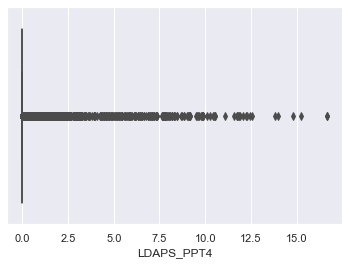

In [90]:
sns.boxplot(x="LDAPS_PPT4",data=df)
outliers("LDAPS_PPT4")

A lot of outliers in LDAPS_PPT4

The first quartile : 37.5102 for lat
The third quartile : 37.5776 for lat
The IQR : 0.06739999999999924 for lat
The left outlier : 37.409099999999995 for lat
The Right outlier : 37.67869999999999 for lat
Left Outliers : 0
Right Outliers : 0


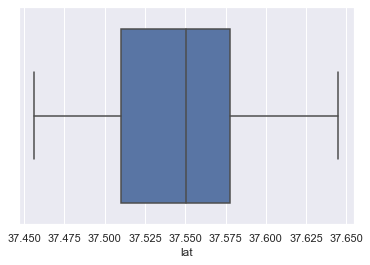

In [91]:
sns.boxplot(x="lat",data=df)
outliers("lat")

No outliers in lat

The first quartile : 126.93700000000001 for lon
The third quartile : 127.042 for lon
The IQR : 0.10499999999998977 for lon
The left outlier : 126.77950000000003 for lon
The Right outlier : 127.19949999999999 for lon
Left Outliers : 0
Right Outliers : 0


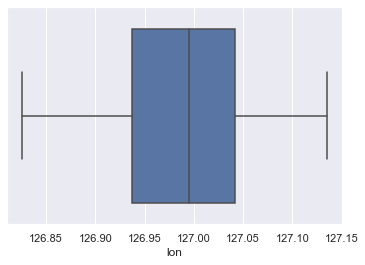

In [92]:
sns.boxplot(x="lon",data=df)
outliers("lon")

No outliers in lon

The first quartile : 28.7 for DEM
The third quartile : 59.8324 for DEM
The IQR : 31.1324 for DEM
The left outlier : -17.9986 for DEM
The Right outlier : 106.531 for DEM
Left Outliers : 0
Right Outliers : 1241


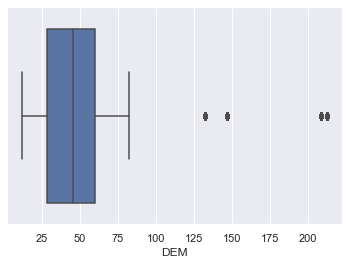

In [93]:
sns.boxplot(x="DEM",data=df)
outliers("DEM")

Some outliers in DEM

The first quartile : 0.2713 for Slope
The third quartile : 1.7678 for Slope
The IQR : 1.4965000000000002 for Slope
The left outlier : -1.9734500000000001 for Slope
The Right outlier : 4.01255 for Slope
Left Outliers : 0
Right Outliers : 621


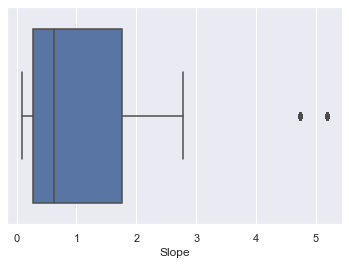

In [94]:
sns.boxplot(x="Slope",data=df)
outliers("Slope")

Some outliers in Slope

The first quartile : 4999.018555 for Solar radiation
The third quartile : 5728.316406 for Solar radiation
The IQR : 729.2978510000003 for Solar radiation
The left outlier : 3905.0717784999993 for Solar radiation
The Right outlier : 6822.263182500001 for Solar radiation
Left Outliers : 0
Right Outliers : 0


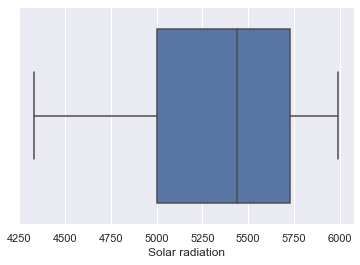

In [95]:
sns.boxplot(x="Solar radiation",data=df)
outliers("Solar radiation")

No outliers in Solar radiation

The first quartile : 28.2 for Next_Tmax
The third quartile : 32.6 for Next_Tmax
The IQR : 4.400000000000002 for Next_Tmax
The left outlier : 21.599999999999994 for Next_Tmax
The Right outlier : 39.2 for Next_Tmax
Left Outliers : 33
Right Outliers : 0


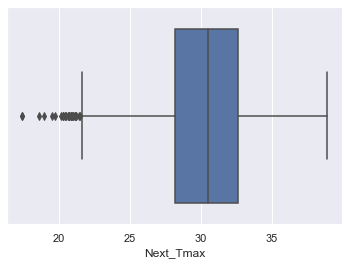

In [96]:
sns.boxplot(x="Next_Tmax",data=df)
outliers("Next_Tmax")

Some outliers in Next_Tmax

The first quartile : 21.4 for Next_Tmin
The third quartile : 24.6 for Next_Tmin
The IQR : 3.200000000000003 for Next_Tmin
The left outlier : 16.599999999999994 for Next_Tmin
The Right outlier : 29.400000000000006 for Next_Tmin
Left Outliers : 92
Right Outliers : 3


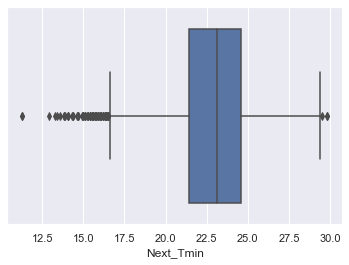

In [97]:
sns.boxplot(x="Next_Tmin",data=df)
outliers("Next_Tmin")

Some outliers in Next_Tmin

The first quartile : 7.0 for Month
The third quartile : 8.0 for Month
The IQR : 1.0 for Month
The left outlier : 5.5 for Month
The Right outlier : 9.5 for Month
Left Outliers : 1250
Right Outliers : 750


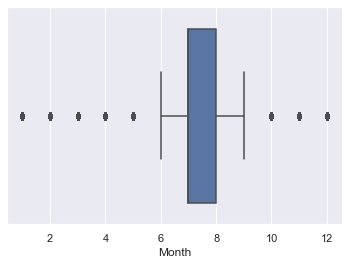

In [98]:
sns.boxplot(x="Month",data=df)
outliers("Month")

Some outliers in Month

The first quartile : 8.0 for Day
The third quartile : 24.0 for Day
The IQR : 16.0 for Day
The left outlier : -16.0 for Day
The Right outlier : 48.0 for Day
Left Outliers : 0
Right Outliers : 0


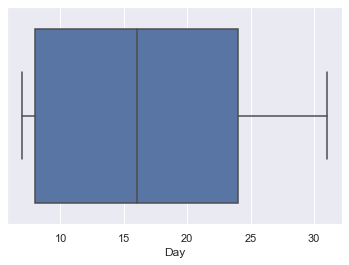

In [99]:
sns.boxplot(x="Day",data=df)
outliers("Day")

No outliers in Day

### There are outliers in the data but there is a high possibility that the values can be genuine as it is associated with Weather Data so we will not remove the outliers. Instead will be using Algorithms that are not affected by outliers 

## Checking data skewness

In [100]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705303
Day                 0.245548
dtype: float64

## Transforming the data to remove skewness

In [101]:
from sklearn.preprocessing import power_transform

In [102]:
df["LDAPS_RHmax"] = power_transform(df["LDAPS_RHmax"].values.reshape(-1,1))

In [103]:
df["LDAPS_RHmax"].skew()

-0.11514268954081511

In [104]:
df["LDAPS_WS"] = power_transform(df["LDAPS_WS"].values.reshape(-1,1))

In [105]:
df["LDAPS_WS"].skew()

0.0024487427382559137

In [106]:
df["LDAPS_PPT1"] = power_transform(df["LDAPS_PPT1"].values.reshape(-1,1))

In [107]:
df["LDAPS_PPT1"].skew()

1.4639406795923642

In [108]:
df["LDAPS_PPT2"] = power_transform(df["LDAPS_PPT2"].values.reshape(-1,1))

In [109]:
df["LDAPS_PPT2"].skew()

1.6464169717979442

In [110]:
df["LDAPS_PPT3"] = power_transform(df["LDAPS_PPT3"].values.reshape(-1,1))

In [111]:
df["LDAPS_PPT3"].skew()

1.824919198317695

In [112]:
df["LDAPS_PPT4"] = power_transform(df["LDAPS_PPT4"].values.reshape(-1,1))

In [113]:
df["LDAPS_PPT4"].skew()

2.059400054293615

In [114]:
df["DEM"] = power_transform(df["DEM"].values.reshape(-1,1))

In [115]:
df["DEM"].skew()

0.03945633970707268

In [116]:
df["Slope"] = power_transform(df["Slope"].values.reshape(-1,1))

In [117]:
df["Slope"].skew()

0.23396817112819315

In [118]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.002449
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705303
Day                 0.245548
dtype: float64

## Most of the skewness has been reduced

In [119]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,0.272915,28.074101,23.006936,0.097757,69.451805,0.233947,0.203896,0.161697,0.130928,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,126.991,1.834978,1.314153,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,0.185831,29.850689,24.035009,-0.622109,51.937448,0.225508,0.251771,0.159444,0.127727,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,127.032,0.055979,-0.385336,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,-0.773454,30.091292,24.565633,-0.310859,20.573050,0.209344,0.257469,0.204091,0.142125,-0.557339,-0.519114,-0.492283,-0.444377,37.5776,127.058,-0.364575,-0.949164,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,1.316777,29.704629,23.326177,-0.653345,65.727144,0.216372,0.226002,0.161157,0.134249,-0.557339,-0.519114,-0.492283,-0.444377,37.6450,127.022,0.084879,1.235263,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,0.110968,29.113934,23.486480,-0.590312,107.965535,0.151407,0.249995,0.178892,0.170021,-0.557339,-0.519114,-0.492283,-0.444377,37.5507,127.135,-0.290442,-0.401730,5859.552246,31.2,22.5,6.0,30.0


## Train Test Split

In [120]:
X = df.drop(["Next_Tmax","Next_Tmin"],axis=1)

In [121]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Day
0,1.0,28.7,21.4,58.255688,0.272915,28.074101,23.006936,0.097757,69.451805,0.233947,0.203896,0.161697,0.130928,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,126.991,1.834978,1.314153,5992.895996,6.0,30.0
1,2.0,31.9,21.6,52.263397,0.185831,29.850689,24.035009,-0.622109,51.937448,0.225508,0.251771,0.159444,0.127727,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,127.032,0.055979,-0.385336,5869.312500,6.0,30.0
2,3.0,31.6,23.3,48.690479,-0.773454,30.091292,24.565633,-0.310859,20.573050,0.209344,0.257469,0.204091,0.142125,-0.557339,-0.519114,-0.492283,-0.444377,37.5776,127.058,-0.364575,-0.949164,5863.555664,6.0,30.0
3,4.0,32.0,23.4,58.239788,1.316777,29.704629,23.326177,-0.653345,65.727144,0.216372,0.226002,0.161157,0.134249,-0.557339,-0.519114,-0.492283,-0.444377,37.6450,127.022,0.084879,1.235263,5856.964844,6.0,30.0
4,5.0,31.4,21.9,56.174095,0.110968,29.113934,23.486480,-0.590312,107.965535,0.151407,0.249995,0.178892,0.170021,-0.557339,-0.519114,-0.492283,-0.444377,37.5507,127.135,-0.290442,-0.401730,5859.552246,6.0,30.0


In [122]:
y = df[["Next_Tmax","Next_Tmin"]]

In [123]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [124]:
X = X.values
y = y.values

In [125]:
X

array([[1.00000000e+00, 2.87000000e+01, 2.14000000e+01, ...,
        5.99289600e+03, 6.00000000e+00, 3.00000000e+01],
       [2.00000000e+00, 3.19000000e+01, 2.16000000e+01, ...,
        5.86931250e+03, 6.00000000e+00, 3.00000000e+01],
       [3.00000000e+00, 3.16000000e+01, 2.33000000e+01, ...,
        5.86355566e+03, 6.00000000e+00, 3.00000000e+01],
       ...,
       [2.50000000e+01, 2.32000000e+01, 1.74000000e+01, ...,
        4.45134522e+03, 8.00000000e+00, 3.00000000e+01],
       [1.30000000e+01, 2.00000000e+01, 1.13000000e+01, ...,
        4.32952051e+03, 7.00000000e+00, 1.60000000e+01],
       [1.30000000e+01, 3.76000000e+01, 2.99000000e+01, ...,
        5.99289600e+03, 7.00000000e+00, 1.60000000e+01]])

In [126]:
y

array([[29.1, 21.2],
       [30.5, 22.5],
       [31.1, 23.9],
       ...,
       [27.8, 17.4],
       [17.4, 11.3],
       [38.9, 29.8]])

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [129]:
X_train.shape

(5814, 24)

In [130]:
X_test.shape

(1938, 24)

In [131]:
y_train.shape

(5814, 2)

In [132]:
y_test.shape

(1938, 2)

## Scaling

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sc = StandardScaler()

In [135]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
X_train

array([[-1.65754023, -1.64526259, -0.50906012, ...,  0.95141038,
        -0.04073219,  0.67808642],
       [ 0.41590073,  1.02801796, -1.21880661, ...,  0.87184952,
        -0.04073219, -0.1718554 ],
       [ 0.96881832, -0.4270588 , -0.21681156, ..., -0.80249167,
         0.40693694,  0.19240538],
       ...,
       [-1.24285204,  0.62195003, -0.67605929, ...,  1.15035346,
        -1.3837396 , -1.14321749],
       [-0.68993445, -0.79928773, -1.51105516, ..., -0.51823111,
         1.74994435, -1.02179723],
       [-0.68993445, -0.19018584, -0.84305846, ..., -0.89033231,
         0.40693694, -0.05043514]])

In [137]:
X_test

array([[ 1.24527712,  0.791145  ,  0.53468472, ..., -0.81653717,
         0.40693694, -0.1718554 ],
       [ 1.24527712,  0.99417897,  0.70168389, ..., -0.25481944,
        -0.04073219, -1.02179723],
       [ 0.55413013,  0.65578902, -0.80130867, ..., -1.33270875,
         0.40693694,  0.67808642],
       ...,
       [-1.38108144,  1.29872992,  1.20268142, ...,  0.71412576,
        -0.04073219,  0.4352459 ],
       [-1.65754023, -1.57758461, -1.8868033 , ..., -1.41166838,
         0.40693694,  1.28518772],
       [-0.41347565, -1.71294058, -0.80130867, ...,  0.58939266,
        -0.04073219,  0.79950668]])

## Machine Learning

#### Linear Regression

In [138]:
from sklearn.metrics import r2_score

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.7959363070418443
for random state  0  The testing accuracy is : 0.8058015913058902


for random state  1  The training accuracy is : 0.7959397486025068
for random state  1  The testing accuracy is : 0.8060430208567915


for random state  2  The training accuracy is : 0.7999720772085943
for random state  2  The testing accuracy is : 0.7930035568551201


for random state  3  The training accuracy is : 0.7989394940816563
for random state  3  The testing accuracy is : 0.7964441963893482


for random state  4  The training accuracy is : 0.7958700025267507
for random state  4  The testing accuracy is : 0.8062865284388907


for random state  5  The training accuracy is : 0.7985229788385702
for random state  5  The testing accuracy is : 0.797853216526978


for random state  6  The training accuracy is : 0.7965708633994573
for random state  6  The testing accuracy is : 0.8037753617535732


for random state  7  The training accuracy is : 0.796731

for random state  69  The training accuracy is : 0.7971192124036003
for random state  69  The testing accuracy is : 0.8026463677116893


for random state  70  The training accuracy is : 0.8000786743705799
for random state  70  The testing accuracy is : 0.7927190556414561


for random state  71  The training accuracy is : 0.7944927000117663
for random state  71  The testing accuracy is : 0.8101304488714364


for random state  72  The training accuracy is : 0.7980042408736789
for random state  72  The testing accuracy is : 0.7995742286326644


for random state  73  The training accuracy is : 0.798819440016578
for random state  73  The testing accuracy is : 0.7968705844940263


for random state  74  The training accuracy is : 0.7985375510448978
for random state  74  The testing accuracy is : 0.7973295202115147


for random state  75  The training accuracy is : 0.8015694964220502
for random state  75  The testing accuracy is : 0.7885030059770456


for random state  76  The training accurac

In [142]:
# Taking best random state as 17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.7981804085051644
The testing accuracy is : 0.7976503108810293




In [143]:
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

1.6896179054220428


### Cross validation 

In [144]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [145]:
kfold_accuracy_LR

0.6835215520474012

In [146]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [147]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.79818,0.79765,1.689618,0.683522


### Random Forest Regression

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9856741817174344
for random state  0  The testing accuracy is : 0.8949167247735677


for random state  1  The training accuracy is : 0.9853242976458798
for random state  1  The testing accuracy is : 0.8942139518894185


for random state  2  The training accuracy is : 0.9858016027000198
for random state  2  The testing accuracy is : 0.8923626811862182


for random state  3  The training accuracy is : 0.9857523799135368
for random state  3  The testing accuracy is : 0.8950525047876632


for random state  4  The training accuracy is : 0.9858113604402594
for random state  4  The testing accuracy is : 0.902965710478433


for random state  5  The training accuracy is : 0.9854840653377308
for random state  5  The testing accuracy is : 0.9005952551914997


for random state  6  The training accuracy is : 0.9853395757544423
for random state  6  The testing accuracy is : 0.8998898874016283


for random state  7  The training accuracy is : 0.985256

for random state  61  The training accuracy is : 0.9855732407453992
for random state  61  The testing accuracy is : 0.8973509157528914


for random state  62  The training accuracy is : 0.985346641023068
for random state  62  The testing accuracy is : 0.9004970911369807


for random state  63  The training accuracy is : 0.9856322044833548
for random state  63  The testing accuracy is : 0.90120056681032


for random state  64  The training accuracy is : 0.9859562871742198
for random state  64  The testing accuracy is : 0.8915871055757231


for random state  65  The training accuracy is : 0.9855154642270749
for random state  65  The testing accuracy is : 0.8954431982654073


for random state  66  The training accuracy is : 0.9857252065266124
for random state  66  The testing accuracy is : 0.8973465370685731


for random state  67  The training accuracy is : 0.9853992803393579
for random state  67  The testing accuracy is : 0.8957623806490053


for random state  68  The training accuracy 

In [150]:
# Taking the best random state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9857030319122772
The testing accuracy is : 0.9038770679593366




In [151]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

0.7676571558520966


In [152]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [153]:
kfold_accuracy_RFR

0.6580931011319608

In [154]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [155]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.798180,0.797650,1.689618,0.683522
1,Random Forest Regression,0.985703,0.903877,0.767657,0.658093


### KNN Regressor

In [156]:
from sklearn.neighbors import KNeighborsRegressor

In [157]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_5 = KNeighborsRegressor() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = r2_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.7008165534216223
for random state  0  The testing accuracy is : 0.5216895553846491


for random state  1  The training accuracy is : 0.7070119067565531
for random state  1  The testing accuracy is : 0.5193074731962967


for random state  2  The training accuracy is : 0.6972688539572747
for random state  2  The testing accuracy is : 0.554113476948672


for random state  3  The training accuracy is : 0.69751137722703
for random state  3  The testing accuracy is : 0.5461409545135545


for random state  4  The training accuracy is : 0.7020378737524025
for random state  4  The testing accuracy is : 0.534665879174812


for random state  5  The training accuracy is : 0.69522090807084
for random state  5  The testing accuracy is : 0.5566508222014486


for random state  6  The training accuracy is : 0.697413993585912
for random state  6  The testing accuracy is : 0.5294288402708204


for random state  7  The training accuracy is : 0.698500686295

for random state  61  The training accuracy is : 0.7041767406899648
for random state  61  The testing accuracy is : 0.5223382770848307


for random state  62  The training accuracy is : 0.6977893417888644
for random state  62  The testing accuracy is : 0.5246161923980519


for random state  63  The training accuracy is : 0.7028236269910055
for random state  63  The testing accuracy is : 0.5205106429166824


for random state  64  The training accuracy is : 0.6964561241414201
for random state  64  The testing accuracy is : 0.5424734441912387


for random state  65  The training accuracy is : 0.7047046317235146
for random state  65  The testing accuracy is : 0.5034672465860734


for random state  66  The training accuracy is : 0.7030883380075645
for random state  66  The testing accuracy is : 0.5356207347309706


for random state  67  The training accuracy is : 0.7029973338615058
for random state  67  The testing accuracy is : 0.5265189112569979


for random state  68  The training accura

In [158]:
# The best random state is 17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=17)
mod_5 = KNeighborsRegressor() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = r2_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.6987096878005938
The testing accuracy is : 0.527717108281387




In [159]:
MSE_5 = mean_squared_error(y_test,pred_5)
print(MSE_5)

3.7547785688437387


In [160]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_KNR = np.mean(abs(K_results))

In [161]:
kfold_accuracy_KNR

0.2328730659679381

In [162]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "K Nearest Neighbors"],
         "Training_Acc":[train_score_1,train_score_2,train_score_5],
        "R2 Score":[test_score_1,test_score_2,test_score_5],
         "MSE":[MSE_1,MSE_2,MSE_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_KNR]}

final_card = pd.DataFrame(score)

In [163]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.798180,0.797650,1.689618,0.683522
1,Random Forest Regression,0.985703,0.903877,0.767657,0.658093
2,K Nearest Neighbors,0.698710,0.527717,3.754779,0.232873


### Bagging Regressor

In [164]:
from sklearn.ensemble import BaggingRegressor

In [165]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9778677481492352
for random state  0  The testing accuracy is : 0.8813915685027225


for random state  1  The training accuracy is : 0.977935016985169
for random state  1  The testing accuracy is : 0.8811838918398189


for random state  2  The training accuracy is : 0.9776090330986452
for random state  2  The testing accuracy is : 0.8753775741550051


for random state  3  The training accuracy is : 0.9782718853375745
for random state  3  The testing accuracy is : 0.8806819699793426


for random state  4  The training accuracy is : 0.9782069145363296
for random state  4  The testing accuracy is : 0.8862115844535274


for random state  5  The training accuracy is : 0.9775857034001105
for random state  5  The testing accuracy is : 0.8875793748192025


for random state  6  The training accuracy is : 0.9781472537719744
for random state  6  The testing accuracy is : 0.8861770990734732


for random state  7  The training accuracy is : 0.977574

for random state  61  The training accuracy is : 0.9779877737024489
for random state  61  The testing accuracy is : 0.8821505327676205


for random state  62  The training accuracy is : 0.9779006920905675
for random state  62  The testing accuracy is : 0.8840171537455841


for random state  63  The training accuracy is : 0.9784432039400718
for random state  63  The testing accuracy is : 0.8834960582097316


for random state  64  The training accuracy is : 0.9775090227234025
for random state  64  The testing accuracy is : 0.8733545006020228


for random state  65  The training accuracy is : 0.9786881763072083
for random state  65  The testing accuracy is : 0.8818430587361595


for random state  66  The training accuracy is : 0.9775052535360254
for random state  66  The testing accuracy is : 0.8808606668667541


for random state  67  The training accuracy is : 0.9775049265201723
for random state  67  The testing accuracy is : 0.8795515988705886


for random state  68  The training accura

In [166]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

0.9632317773510677


In [167]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [168]:
kfold_accuracy_BR

0.6327491155252634

In [169]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "K Nearest Neighbors","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_5,
                        train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_5,
                   test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_5,MSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_KNR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [170]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.798180,0.797650,1.689618,0.683522
1,Random Forest Regression,0.985703,0.903877,0.767657,0.658093
2,K Nearest Neighbors,0.698710,0.527717,3.754779,0.232873
3,Bagging Regressor,0.977824,0.878872,0.963232,0.658093


## Decision Tree

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_7 = DecisionTreeRegressor() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = r2_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.7619444684781915


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7789320906271833


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7595106257174183


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.771012281338967


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.7539827416910071


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.766373701011613


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7630890609863443


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.7697082388067756


for random state  8  The training accuracy

for random state  68  The training accuracy is : 1.0
for random state  68  The testing accuracy is : 0.7563160079940067


for random state  69  The training accuracy is : 1.0
for random state  69  The testing accuracy is : 0.7639935222263742


for random state  70  The training accuracy is : 1.0
for random state  70  The testing accuracy is : 0.7613796011584766


for random state  71  The training accuracy is : 1.0
for random state  71  The testing accuracy is : 0.7860009342724998


for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.7605708879008033


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.7653891418259794


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.7569841010772009


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.7527458408192449


for random state  76  Th

In [173]:
# Taking 1 as best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
mod_7 = DecisionTreeRegressor() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = r2_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 0.7788364993883012




In [174]:
MSE_7 = mean_squared_error(y_test,pred_7)
print(MSE_7)

1.7451977153048257


In [175]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [176]:
kfold_accuracy_DT

0.3799295097653298

In [177]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "K Nearest Neighbors","Bagging Regressor","Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_5,
                        train_score_6,train_score_7],
        "R2 Score":[test_score_1,test_score_2,test_score_5,
                   test_score_6,test_score_7],
         "MSE":[MSE_1,MSE_2,MSE_5,MSE_6,MSE_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_KNR,kfold_accuracy_RFR,
                           kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [178]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.798180,0.797650,1.689618,0.683522
1,Random Forest Regression,0.985703,0.903877,0.767657,0.658093
2,K Nearest Neighbors,0.698710,0.527717,3.754779,0.232873
3,Bagging Regressor,0.977824,0.878872,0.963232,0.658093
4,Decision Tree,1.000000,0.778836,1.745198,0.379930


#### Regularization

####  Ridge

In [186]:
from sklearn.linear_model import Lasso

In [187]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_8 = Lasso() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = r2_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.7398871289817851
for random state  0  The testing accuracy is : 0.7537580217731519


for random state  1  The training accuracy is : 0.7417293084355965
for random state  1  The testing accuracy is : 0.7482579889572674


for random state  2  The training accuracy is : 0.7454757782389179
for random state  2  The testing accuracy is : 0.7360729444120175


for random state  3  The training accuracy is : 0.7422698144653634
for random state  3  The testing accuracy is : 0.7426778488135034


for random state  4  The training accuracy is : 0.7410661498826128
for random state  4  The testing accuracy is : 0.7505921848603807


for random state  5  The training accuracy is : 0.7443969495983452
for random state  5  The testing accuracy is : 0.7421233744351807


for random state  6  The training accuracy is : 0.7428890949061879
for random state  6  The testing accuracy is : 0.7419988184513433


for random state  7  The training accuracy is : 0.74241

for random state  79  The training accuracy is : 0.7436262999411339
for random state  79  The testing accuracy is : 0.7480073963567808


for random state  80  The training accuracy is : 0.7467478984468533
for random state  80  The testing accuracy is : 0.7350460031681368


for random state  81  The training accuracy is : 0.7447696497262186
for random state  81  The testing accuracy is : 0.7422018623867884


for random state  82  The training accuracy is : 0.743070851468494
for random state  82  The testing accuracy is : 0.7451479010565734


for random state  83  The training accuracy is : 0.7447280928580706
for random state  83  The testing accuracy is : 0.7385305135942601


for random state  84  The training accuracy is : 0.7417000626830029
for random state  84  The testing accuracy is : 0.7449053519502766


for random state  85  The training accuracy is : 0.7439734532991784
for random state  85  The testing accuracy is : 0.7379653046447437


for random state  86  The training accurac

In [194]:
# Taking the best random state as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
mod_8 = Lasso() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = r2_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.7417293084355965
The testing accuracy is : 0.7482579889572674




In [195]:
MSE_8 = mean_squared_error(y_test,pred_8)
print(MSE_8)

2.0414752541966146


In [196]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_lasso = np.mean(abs(K_results))

In [197]:
kfold_accuracy_lasso

0.6421305257404042

## Ridge

In [198]:
from sklearn.linear_model import Ridge

In [199]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_9 = Ridge() 
    mod_9.fit(X_train,y_train)
    train_score_9 = mod_9.score(X_train,y_train)
    pred_9 = mod_9.predict(X_test)
    test_score_9 = r2_score(y_test,pred_9)
    
    print("for random state ",i," The training accuracy is :",train_score_9)
    print("for random state ",i," The testing accuracy is :",test_score_9)
    print("\n")

for random state  0  The training accuracy is : 0.7959319301711237
for random state  0  The testing accuracy is : 0.8058631789461245


for random state  1  The training accuracy is : 0.7959363514466851
for random state  1  The testing accuracy is : 0.8060536907168029


for random state  2  The training accuracy is : 0.7999680406785854
for random state  2  The testing accuracy is : 0.7930850030429106


for random state  3  The training accuracy is : 0.7989372297058062
for random state  3  The testing accuracy is : 0.7964137339387813


for random state  4  The training accuracy is : 0.7958666388857216
for random state  4  The testing accuracy is : 0.8062993442542046


for random state  5  The training accuracy is : 0.7985198223442593
for random state  5  The testing accuracy is : 0.7978705820820644


for random state  6  The training accuracy is : 0.7965679725585308
for random state  6  The testing accuracy is : 0.8037827994643432


for random state  7  The training accuracy is : 0.79672

for random state  61  The training accuracy is : 0.7962586456664809
for random state  61  The testing accuracy is : 0.8051525192475963


for random state  62  The training accuracy is : 0.798055543949687
for random state  62  The testing accuracy is : 0.7990497838906441


for random state  63  The training accuracy is : 0.7972371031704603
for random state  63  The testing accuracy is : 0.800903211690343


for random state  64  The training accuracy is : 0.8003290766350517
for random state  64  The testing accuracy is : 0.791793151916098


for random state  65  The training accuracy is : 0.800786140406416
for random state  65  The testing accuracy is : 0.7907402064380646


for random state  66  The training accuracy is : 0.7996674875712599
for random state  66  The testing accuracy is : 0.7942577269541596


for random state  67  The training accuracy is : 0.7990377983584798
for random state  67  The testing accuracy is : 0.7957995441720681


for random state  68  The training accuracy i

In [201]:
# taking the best random state as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
mod_9 = Ridge() 
mod_9.fit(X_train,y_train)
train_score_9 = mod_9.score(X_train,y_train)
pred_9 = mod_9.predict(X_test)
test_score_9 = r2_score(y_test,pred_9)
    
print("The training accuracy is :",train_score_9)
print("The testing accuracy is :",test_score_9)
print("\n")

The training accuracy is : 0.7959363514466851
The testing accuracy is : 0.8060536907168029




In [202]:
MSE_9 = mean_squared_error(y_test,pred_9)
print(MSE_9)

1.585781495548203


In [203]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_9,X,y,cv=kfold)

kfold_accuracy_Ridge = np.mean(abs(K_results))

In [204]:
kfold_accuracy_Ridge

0.6836332954064013

## ElasticNet

In [205]:
from sklearn.linear_model import ElasticNet

In [206]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_10 = ElasticNet() 
    mod_10.fit(X_train,y_train)
    train_score_10 = mod_10.score(X_train,y_train)
    pred_10 = mod_10.predict(X_test)
    test_score_10 = r2_score(y_test,pred_10)
    
    print("for random state ",i," The training accuracy is :",train_score_10)
    print("for random state ",i," The testing accuracy is :",test_score_10)
    print("\n")

for random state  0  The training accuracy is : 0.7542758664397957
for random state  0  The testing accuracy is : 0.7676433589790937


for random state  1  The training accuracy is : 0.755762873766588
for random state  1  The testing accuracy is : 0.7625411750991055


for random state  2  The training accuracy is : 0.7594079076078171
for random state  2  The testing accuracy is : 0.7520411656550707


for random state  3  The training accuracy is : 0.7564793994928662
for random state  3  The testing accuracy is : 0.7589467666609198


for random state  4  The training accuracy is : 0.7549389137603323
for random state  4  The testing accuracy is : 0.7654516968982936


for random state  5  The training accuracy is : 0.7581742332701122
for random state  5  The testing accuracy is : 0.7565086248094604


for random state  6  The training accuracy is : 0.7570846655391992
for random state  6  The testing accuracy is : 0.756774485785344


for random state  7  The training accuracy is : 0.7566411

for random state  71  The training accuracy is : 0.7536774996439852
for random state  71  The testing accuracy is : 0.7688145920814813


for random state  72  The training accuracy is : 0.7573347615203205
for random state  72  The testing accuracy is : 0.7582134058572974


for random state  73  The training accuracy is : 0.7570278027887518
for random state  73  The testing accuracy is : 0.7573604884905292


for random state  74  The training accuracy is : 0.7578271908658551
for random state  74  The testing accuracy is : 0.7577271594214816


for random state  75  The training accuracy is : 0.7611164747705619
for random state  75  The testing accuracy is : 0.7466271532657343


for random state  76  The training accuracy is : 0.7584458091070061
for random state  76  The testing accuracy is : 0.7584659174484967


for random state  77  The training accuracy is : 0.7584857737503645
for random state  77  The testing accuracy is : 0.7567283273380248


for random state  78  The training accura

In [207]:
# Taking the best random state as 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=10)
mod_10 = ElasticNet() 
mod_10.fit(X_train,y_train)
train_score_10 = mod_10.score(X_train,y_train)
pred_10 = mod_10.predict(X_test)
test_score_10 = r2_score(y_test,pred_10)
    
print("The training accuracy is :",train_score_10)
print("The testing accuracy is :",test_score_10)
print("\n")

The training accuracy is : 0.7566349699055115
The testing accuracy is : 0.7583330104652026




In [208]:
MSE_10 = mean_squared_error(y_test,pred_10)
print(MSE_10)

2.013034336064741


In [209]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_10,X,y,cv=kfold)

kfold_accuracy_EN = np.mean(abs(K_results))

In [210]:
kfold_accuracy_EN

0.6575815984359201

In [211]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "K Nearest Neighbors","Bagging Regressor","Decision Tree",
                     "Lasso","Ridge","Elastic Net"],
         "Training_Acc":[train_score_1,train_score_2,train_score_5,
                        train_score_6,train_score_7,train_score_8,train_score_9,
                        train_score_10],
        "R2 Score":[test_score_1,test_score_2,test_score_5,
                   test_score_6,test_score_7,test_score_8,test_score_9,
                   test_score_10],
         "MSE":[MSE_1,MSE_2,MSE_5,MSE_6,MSE_7,MSE_8,MSE_9,MSE_10],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_KNR,kfold_accuracy_RFR,
                           kfold_accuracy_DT,kfold_accuracy_lasso,
                           kfold_accuracy_Ridge,kfold_accuracy_EN]}

final_card = pd.DataFrame(score)

In [212]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.798180,0.797650,1.689618,0.683522
1,Random Forest Regression,0.985703,0.903877,0.767657,0.658093
2,K Nearest Neighbors,0.698710,0.527717,3.754779,0.232873
3,Bagging Regressor,0.977824,0.878872,0.963232,0.658093
4,Decision Tree,1.000000,0.778836,1.745198,0.379930
5,Lasso,0.741729,0.748258,2.041475,0.642131
6,Ridge,0.795936,0.806054,1.585781,0.683633
7,Elastic Net,0.756635,0.758333,2.013034,0.657582


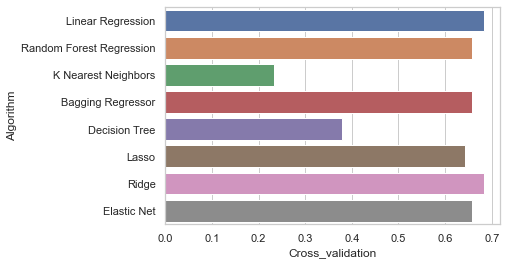

In [214]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

#### Based on cross validation score Ridge regression is having the best performance

In [217]:
maxx = mod_9.coef_[0]

In [218]:
minn = mod_9.coef_[1]

In [219]:
col = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Month', 'Day']

<AxesSubplot:>

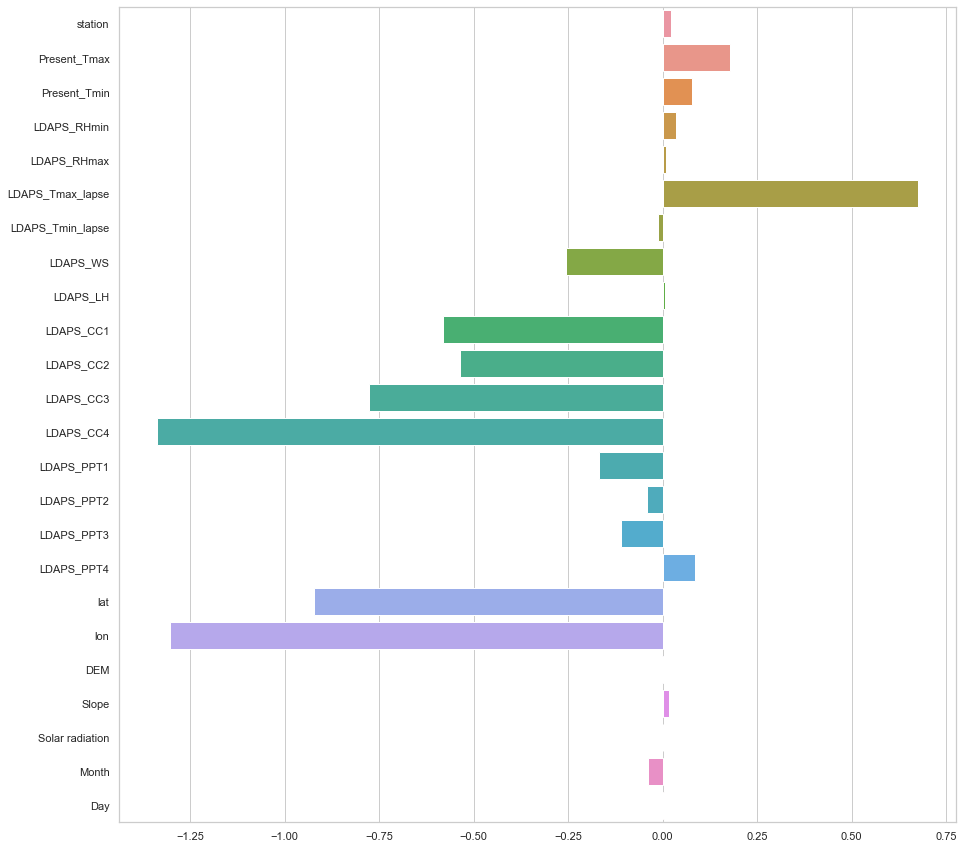

In [220]:
plt.figure(figsize=(15,15))
sns.barplot(y=col,x=maxx)

Observations from the plot:

- LDAPS_Tmax_lapse is turning out to be the most important positive coefficient feature in predicting the next day max temperature


- Ldaps_CC4 is turning out to be the most important negetive coefficient  feature in predicting the next day max temperature

<AxesSubplot:>

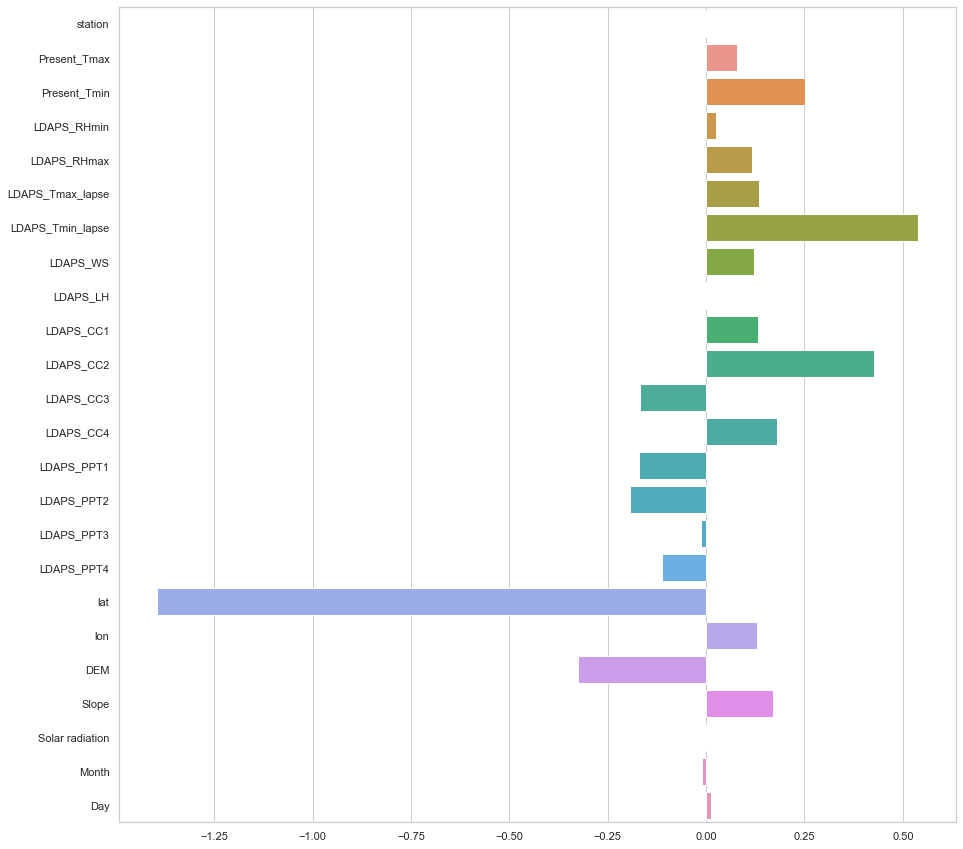

In [221]:
plt.figure(figsize=(15,15))
sns.barplot(y=col,x=minn)

Observations from the plot:

- LDAPS_Tmin_Lapse is turning out to be the most important positive coefficient feature in predicting the next day min temperature


- Latitude is turning out to be the most important negetive coefficient  feature in predicting the next day min temperature

#### Hyperparametric Tuning

#### Grid Search CV

In [222]:
from sklearn.model_selection import GridSearchCV

In [225]:
alpha = [1.0,1.5,2.0,2.5]
solver = ["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]
tol =[0.01,0.001,0.0001]
fit_intercept = [True,False]

#### Parameters for Ridge Regressor

In [226]:
parameters = {
    "alpha":alpha,
    "solver":solver,
    "tol":tol,
    "fit_intercept":fit_intercept
}

In [227]:
parameters

{'alpha': [1.0, 1.5, 2.0, 2.5],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
 'tol': [0.01, 0.001, 0.0001],
 'fit_intercept': [True, False]}

In [228]:
es = Ridge()

#### GRID SEARCH CV

In [229]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [230]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=2)

#### Best Estinators

In [231]:
grid_search.best_estimator_

Ridge(tol=0.01)

#### Best Parameters

In [232]:
grid_search.best_params_

{'alpha': 1.0, 'fit_intercept': True, 'solver': 'auto', 'tol': 0.01}

#### Best Score

In [233]:
grid_search.best_score_

0.7955422987959238

In [234]:
predictions = grid_search.predict(X_test)

In [235]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [236]:
from sklearn.metrics import explained_variance_score,mean_absolute_error

### Variance

In [237]:
variance = explained_variance_score(y_test,predictions)

### Mean Absolute Error

In [238]:
MAE = mean_absolute_error(y_test,predictions)

### Mean Square Error

In [239]:
MSE = mean_squared_error(y_test,predictions)

### Root Mean Square Error

In [240]:
RMSE = np.sqrt(MSE)

### Regression metrics

In [241]:
card = {
    "Train Score":[grid_search.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE],
    "MSE":[MSE],
    "RMSE":[RMSE]
}

metrics = pd.DataFrame(card)

In [242]:
metrics

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.797909,0.79968,0.797061,0.800258,0.960481,1.67576,1.294511


In [243]:
grid_search

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=2)

### Saving the model

In [244]:
import pickle

In [245]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [246]:
with open("model_pickle","rb") as f:
    
    temp = pickle.load(f)

### Conclusion

Text(0, 0.5, 'Predicted Y')

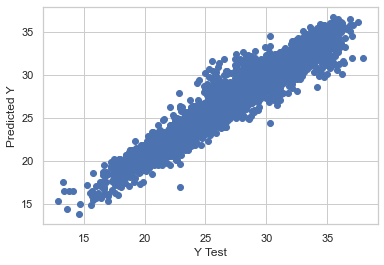

In [250]:
#scatterplot of the real test values versus the predicted values

plt.scatter(y_test,predictions)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

### We can observe that when we plot the predicted values with the actual values we get a graph that looks some what linear in nature

<AxesSubplot:ylabel='Density'>

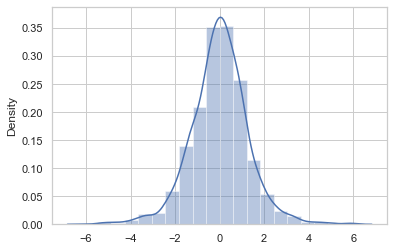

In [254]:
sns.distplot((y_test-predictions),bins=20)

### Ploting a histogram of the residuals to make sure it looks normally distributed

## Comparing Predicted values with Actual values

In [258]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,0.272915,28.074101,23.006936,0.097757,69.451805,0.233947,0.203896,0.161697,0.130928,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,126.991,1.834978,1.314153,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,0.185831,29.850689,24.035009,-0.622109,51.937448,0.225508,0.251771,0.159444,0.127727,-0.557339,-0.519114,-0.492283,-0.444377,37.6046,127.032,0.055979,-0.385336,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,-0.773454,30.091292,24.565633,-0.310859,20.573050,0.209344,0.257469,0.204091,0.142125,-0.557339,-0.519114,-0.492283,-0.444377,37.5776,127.058,-0.364575,-0.949164,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,1.316777,29.704629,23.326177,-0.653345,65.727144,0.216372,0.226002,0.161157,0.134249,-0.557339,-0.519114,-0.492283,-0.444377,37.6450,127.022,0.084879,1.235263,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,0.110968,29.113934,23.486480,-0.590312,107.965535,0.151407,0.249995,0.178892,0.170021,-0.557339,-0.519114,-0.492283,-0.444377,37.5507,127.135,-0.290442,-0.401730,5859.552246,31.2,22.5,6.0,30.0


In [259]:
predictions

array([[26.47868084, 22.80776485],
       [30.30302523, 24.6654839 ],
       [35.19409123, 25.79537536],
       ...,
       [32.18665822, 24.00021458],
       [32.38743835, 26.11164749],
       [30.82260164, 24.96591418]])

In [265]:
predict_values = pd.DataFrame(predictions,columns=["Max Temp(P)","Min Temp(P)"])

In [266]:
predict_values.head()

,Max Temp(P),Min Temp(P)
0,26.478681,22.807765
1,30.303025,24.665484
2,35.194091,25.795375
3,32.824370,24.624116
4,28.089380,24.844875


In [267]:
actual_values = pd.DataFrame(y_test,columns=["Max Temp(A)","Min Temp(A)"])

In [268]:
actual_values.head()

,Max Temp(A),Min Temp(A)
0,28.5,22.5
1,30.6,24.1
2,34.4,26.5
3,32.4,23.9
4,29.3,25.4


In [269]:
final_val = pd.concat([actual_values,predict_values],axis=1)

In [270]:
final_val.head()

,Max Temp(A),Min Temp(A),Max Temp(P),Min Temp(P)
0,28.5,22.5,26.478681,22.807765
1,30.6,24.1,30.303025,24.665484
2,34.4,26.5,35.194091,25.795375
3,32.4,23.9,32.824370,24.624116
4,29.3,25.4,28.089380,24.844875


- Max Temp(A) = Actual Max temperature values

- Min Temp(A) = Actual Min temperature values


- Max Temp(P) = Predicted Max temperature values

- Min Temp(P) = Predicted Min temperature values